# Project 2: Location, Location, Location!!

# Table of contents
1. [Problem Statement](#problemstatement)
2. [External Research](#externalresearch)
3. [Data Cleaning](#datacleaning)
4. [Exploratory Data Analysis](#eda)
    1. [Heatmap](#heatmap)
    2. [Feature Selection (lasso)](#featureselection)
5. [L<sup>3</sup>'s Model](#lmodel)
    1. [Summary](#lmodelsummary)
6. ['Quality' Model](#qualitymodel)
    1. [Summary](#qualitymodelsummary)
7. [Optimal Model](#optimalmodel)
    1. [Summary](#optimalmodelsummary)
    2. [Model Comparison \#1](#modelcomp1)
8. [Improved Optimal Model](#ioptimalmodel)
    1. [Summary](#ioptimalmodelsummary)
    2. [Model Comparison \#2](#modelcomp2)
9. [Kaggle](#kaggle)
10. [Visualisation Analysis](#vizanal)
11. [Conclusion and Recommendations](#conclusion)
13. [Sources](#sources)

## Problem Statement <a name="problemstatement"></a>
---

Location, Location, Location! <br><br>
You have been commissioned by a L<sup>3</sup> Properties, a real estate company that prides itself on its statement that location is the second-most important feature/predictor (after size) so much so that they have modelled their price predictive model based on this. 
As a result, their current price model is only based on size and location. 
<br><br>
Identify if location is truly the second-most important feature/predictor, and produce a more accurate model.

## External Research <a name="externalresearch"></a>
---

Based on [multiple](https://www.opendoor.com/w/blog/factors-that-influence-home-value) [sources](https://www.moving.com/tips/7-key-factors-that-impact-the-value-of-your-home/), we have learnt that while location is indeed a big and common factor in identifying the value of a home, there are also many other factors that play their part. Although this data set is incredibly detailed, we identified there were many features that were either unncessary, or simply too similar to another. Because of this, we have selected only a fraction of the original features that we understand to be the primary predictors of home value.
<br><br>
The features that we selected were all related to some extent to the factors listed in this [article](https://blog.bhhsmichiganrealestate.com/13-factors-that-determine-your-home-appraisal-value/), given the data that we had.

### Columns to be kept based on external research

#### Location
1) `MS Zoning` (Nominal): Identifies the general zoning classification of the sale<br>
2) `Neighborhood` (Nominal): Physical locations within Ames city limits (map available)<br>
3) `Condition 1` (Nominal): Proximity to various conditions<br>
4) `Condition 2` (Nominal): Proximity to various conditions (if more than one is present)<br>


#### Structural Construction Materials and Updates
5) `Overall Qual` (Ordinal): Rates the overall material and finish of the house<br>


#### Age of the Home
6) `Year Built` (Discrete): Original construction date<br>

#### Design Style of the Home
7) `MS SubClass` (Nominal): Identifies the type of dwelling involved in the sale<br>
8) `House Style` (Nominal): Style of dwelling<br>


#### Curb Appeal
9) `Lot Frontage` (Continuous): Linear feet of street connected to property<br>
10) `Lot Config` (Nominal): Lot configuration<br>

#### Number of Bedrooms

11) `Bedroom Abvgr` (Discrete): Bedrooms above grade (does NOT include basement bedrooms)

#### Number of Bathrooms

12) `Bsmt Full Bath` (Discrete): Basement full bathrooms<br>
13) `Bsmt Half Bath` (Discrete): Basement half bathrooms<br>
14) `Full Bath` (Discrete): Full bathrooms above grade<br>
15) `Half Bath` (Discrete): Half baths above grade<br>

#### Square Footage
16) `Low Qual Fin SF` (Continuous): Low quality finished square feet (all floors)<br>
17) `Total Bsmt SF` (Continuous): Total square feet of basement area<br>
18) `Lot Area` (Continuous): Lot size in square feet<br>
19) `Gr Liv Area` (Continuous): Above grade (ground) living area square feet<br>


#### Heat and Air
20) `Central Air` (Nominal): Central air conditioning<br>
21) `Heating`	(Nominal): Type of heating<br>
22) `Utilities` (Ordinal): Type of utilities available<br>

#### Garage Space
23) `Garage Area` (Continuous): Size of garage in square feet<br>

#### Recent Home Renovations
24) `Year Remod/Add` (Discrete): Remodel date (same as construction date if no remodeling or additions)<br>
25) `Overall Cond` (Ordinal): Rates the overall condition of the house<br>

#### Comps
26) `Bldg Type` (Nominal): Type of dwelling<br>
27) `Pool QC` (Ordinal): Pool quality<br>





<br>
By discerning which features are more relevant to the prediction of a home's value, we are able to cut down the number of features from 81 to just 27.

### Column to be kept for comparison

#### Sale Price
28) `SalePrice` (Continuous): Sale price $$

## Imports!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, RidgeCV, ElasticNetCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from PIL import Image

Set seed:

In [2]:
np.random.seed(42)

## Reading the data
---

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
# changing from year to years since
df['Year Remod/Add'] = df['Yr Sold'] - df['Year Remod/Add']

In [6]:
# changing from year to age
df['Year Built'] = df['Yr Sold'] - df['Year Built'] 

In [7]:
df.rename(columns={'Year Remod/Add': 'yrs since remod/add',
                   'Year Built': 'age'}, inplace=True)

In [8]:
df[['MS Zoning',
    'Neighborhood', 
    'Condition 1',
    'Condition 2', 
    'Overall Qual', 
    'age',
    'House Style', 
    'MS SubClass', 
    'Lot Frontage', 
    'Lot Config', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath',
    'Full Bath',
    'Half Bath',
    'Low Qual Fin SF',
    'Total Bsmt SF',
    'Lot Area',
    'Gr Liv Area',
    'Central Air',
    'Heating',
    'Utilities',
    'Garage Area',
    'yrs since remod/add',
    'Overall Cond',
    'Bldg Type',
    'Pool Area',
    'SalePrice'
     ]]

,MS Zoning,Neighborhood,Condition 1,Condition 2,Overall Qual,age,House Style,MS SubClass,Lot Frontage,Lot Config,...,Gr Liv Area,Central Air,Heating,Utilities,Garage Area,yrs since remod/add,Overall Cond,Bldg Type,Pool Area,SalePrice
0,RL,Sawyer,RRAe,Norm,6,34,2Story,60,NaN,CulDSac,...,1479,Y,GasA,AllPub,475.0,5,8,1Fam,0,130500
1,RL,SawyerW,Norm,Norm,7,13,2Story,60,43.0,CulDSac,...,2122,Y,GasA,AllPub,559.0,12,5,1Fam,0,220000
2,RL,NAmes,Norm,Norm,5,57,1Story,20,68.0,Inside,...,1057,Y,GasA,AllPub,246.0,3,7,1Fam,0,109000
3,RL,Timber,Norm,Norm,5,4,2Story,60,73.0,Inside,...,1444,Y,GasA,AllPub,400.0,3,5,1Fam,0,174000
4,RL,SawyerW,Norm,Norm,6,110,1.5Fin,50,82.0,Inside,...,1445,Y,GasA,AllPub,484.0,17,8,1Fam,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Timber,Norm,Norm,8,1,1Story,20,79.0,Inside,...,1728,Y,GasA,AllPub,520.0,1,5,1Fam,0,298751
2047,RL,Edwards,Norm,Norm,4,69,1Story,30,NaN,Inside,...,861,Y,GasA,AllPub,539.0,59,5,1Fam,0,82500
2048,RL,Crawfor,Norm,Norm,6,81,1.5Fin,50,57.0,Inside,...,1913,Y,GasA,AllPub,342.0,59,6,1Fam,0,177000
2049,RL,NAmes,Norm,Norm,4,53,1Story,20,80.0,Corner,...,1200,Y,GasA,AllPub,294.0,53,5,1Fam,0,144000


In [9]:
df = df[['MS Zoning',
    'Neighborhood', 
    'Condition 1',
    'Condition 2', 
    'Overall Qual', 
    'age',
    'House Style', 
    'MS SubClass', 
    'Lot Frontage', 
    'Lot Config', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath',
    'Full Bath',
    'Half Bath',
    'Low Qual Fin SF',
    'Total Bsmt SF',
    'Lot Area',
    'Gr Liv Area',
    'Central Air',
    'Heating',
    'Utilities',
    'Garage Area',
    'yrs since remod/add',
    'Overall Cond',
    'Bldg Type',
    'Pool Area',
    'SalePrice'
     ]]

## Data Cleaning<a name="datacleaning"></a>
---

Change column names to lower case and underscore

In [10]:

df.columns = np.array([column.lower() for column in df.columns])

def underscore(word):
    word = word.replace(' ', '_')
    return word
    
df.columns.map(underscore)
df.columns = df.columns.map(underscore)

Checking the types of data in each column:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ms_zoning            2051 non-null   object 
 1   neighborhood         2051 non-null   object 
 2   condition_1          2051 non-null   object 
 3   condition_2          2051 non-null   object 
 4   overall_qual         2051 non-null   int64  
 5   age                  2051 non-null   int64  
 6   house_style          2051 non-null   object 
 7   ms_subclass          2051 non-null   int64  
 8   lot_frontage         1721 non-null   float64
 9   lot_config           2051 non-null   object 
 10  bedroom_abvgr        2051 non-null   int64  
 11  bsmt_full_bath       2049 non-null   float64
 12  bsmt_half_bath       2049 non-null   float64
 13  full_bath            2051 non-null   int64  
 14  half_bath            2051 non-null   int64  
 15  low_qual_fin_sf      2051 non-null   i

Data has 2051 rows and 27 columns

Checking for null values:

In [12]:
df.isnull().sum()

ms_zoning                0
neighborhood             0
condition_1              0
condition_2              0
overall_qual             0
age                      0
house_style              0
ms_subclass              0
lot_frontage           330
lot_config               0
bedroom_abvgr            0
bsmt_full_bath           2
bsmt_half_bath           2
full_bath                0
half_bath                0
low_qual_fin_sf          0
total_bsmt_sf            1
lot_area                 0
gr_liv_area              0
central_air              0
heating                  0
utilities                0
garage_area              1
yrs_since_remod/add      0
overall_cond             0
bldg_type                0
pool_area                0
saleprice                0
dtype: int64

In [13]:
# assign a dataframe of nullvalue columns
df_null = df.loc[:, df.isnull().any()]
df_null.head()

,lot_frontage,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,garage_area
0,NaN,0.0,0.0,725.0,475.0
1,43.0,1.0,0.0,913.0,559.0
2,68.0,1.0,0.0,1057.0,246.0
3,73.0,0.0,0.0,384.0,400.0
4,82.0,0.0,0.0,676.0,484.0


There are 5 columns with at least 1 null value

For each column, we will consult the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) to check if it can be set to a logical value. Failing that, we will drop the rows with the offending null values

### `lot_frontage`
#### Description
- Linear feet of street connected to property
<br>

#### Solution
- Null value would logically mean no frontage
- Fill with 0

In [14]:
# Finding number of null values for lot_frontage
df_null.loc[df_null['lot_frontage'].isnull()]

,lot_frontage,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,garage_area
0,NaN,0.0,0.0,725.0,475.0
7,NaN,1.0,0.0,1188.0,531.0
8,NaN,0.0,0.0,924.0,420.0
23,NaN,1.0,0.0,1168.0,420.0
27,NaN,0.0,0.0,942.0,240.0
...,...,...,...,...,...
2016,NaN,1.0,0.0,912.0,300.0
2022,NaN,1.0,0.0,1844.0,540.0
2028,NaN,0.0,0.0,1568.0,508.0
2031,NaN,1.0,0.0,1078.0,500.0


There are 330 rows where `lot_frontage` is null

In [15]:
df['lot_frontage'] = df['lot_frontage'].fillna(0)

In [16]:
df 

,ms_zoning,neighborhood,condition_1,condition_2,overall_qual,age,house_style,ms_subclass,lot_frontage,lot_config,...,gr_liv_area,central_air,heating,utilities,garage_area,yrs_since_remod/add,overall_cond,bldg_type,pool_area,saleprice
0,RL,Sawyer,RRAe,Norm,6,34,2Story,60,0.0,CulDSac,...,1479,Y,GasA,AllPub,475.0,5,8,1Fam,0,130500
1,RL,SawyerW,Norm,Norm,7,13,2Story,60,43.0,CulDSac,...,2122,Y,GasA,AllPub,559.0,12,5,1Fam,0,220000
2,RL,NAmes,Norm,Norm,5,57,1Story,20,68.0,Inside,...,1057,Y,GasA,AllPub,246.0,3,7,1Fam,0,109000
3,RL,Timber,Norm,Norm,5,4,2Story,60,73.0,Inside,...,1444,Y,GasA,AllPub,400.0,3,5,1Fam,0,174000
4,RL,SawyerW,Norm,Norm,6,110,1.5Fin,50,82.0,Inside,...,1445,Y,GasA,AllPub,484.0,17,8,1Fam,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Timber,Norm,Norm,8,1,1Story,20,79.0,Inside,...,1728,Y,GasA,AllPub,520.0,1,5,1Fam,0,298751
2047,RL,Edwards,Norm,Norm,4,69,1Story,30,0.0,Inside,...,861,Y,GasA,AllPub,539.0,59,5,1Fam,0,82500
2048,RL,Crawfor,Norm,Norm,6,81,1.5Fin,50,57.0,Inside,...,1913,Y,GasA,AllPub,342.0,59,6,1Fam,0,177000
2049,RL,NAmes,Norm,Norm,4,53,1Story,20,80.0,Corner,...,1200,Y,GasA,AllPub,294.0,53,5,1Fam,0,144000


### `bsmt_full_bath`
#### Description
- Number of full bathrooms in the basement
<br>

#### Solution
- Null value would logically mean no full bathrooms in the basement
- Fill with 0

In [17]:
# Finding number of null values for bsmt_full_bath
df_null.loc[df_null['bsmt_full_bath'].isnull()]

,lot_frontage,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,garage_area
616,123.0,NaN,NaN,0.0,624.0
1327,99.0,NaN,NaN,NaN,280.0


There are 2 rows where `bsmt_full_bath` is null 

In [18]:
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0)

### `bsmt_half_bath`
#### Description
- Number of half bathrooms in the basement
<br>

#### Solution
- Null value would logically mean no half bathrooms in the basement
- Fill with 0

In [19]:
# Finding number of null values for bsmt_half_bath
df_null.loc[df_null['bsmt_half_bath'].isnull()]

,lot_frontage,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,garage_area
616,123.0,NaN,NaN,0.0,624.0
1327,99.0,NaN,NaN,NaN,280.0


There are 2 rows where `bsmt_half_bath` is null 

In [20]:
df['bsmt_half_bath'] = df['bsmt_half_bath'].fillna(0)

### `total_bsmt_sf`
#### Description
- Total area of the basement in square feet
<br>

#### Solution
- Null value would logically mean there is no basement; an area of zero
- Fill with 0

In [21]:
# Finding number of null values for total_bsmt_sf
df_null.loc[df_null['total_bsmt_sf'].isnull()]

,lot_frontage,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,garage_area
1327,99.0,NaN,NaN,NaN,280.0


There is 1 row where `total_bsmt_sf` is null 

In [22]:
df['total_bsmt_sf'] = df['total_bsmt_sf'].fillna(0)

### `garage_area`
#### Description
- Total area of the garage in square feet
<br>

#### Solution
- Null value would logically mean there is no garage; an area of zero
- Fill with 0

In [23]:
# Finding number of null values for garage_area
df_null.loc[df_null['garage_area'].isnull()]

,lot_frontage,bsmt_full_bath,bsmt_half_bath,total_bsmt_sf,garage_area
1712,50.0,0.0,0.0,859.0,NaN


There is 1 row where `garage_area` is null 

In [24]:
df['garage_area'] = df['garage_area'].fillna(0)

In [25]:
# check for nulls
df.isnull().sum()

ms_zoning              0
neighborhood           0
condition_1            0
condition_2            0
overall_qual           0
age                    0
house_style            0
ms_subclass            0
lot_frontage           0
lot_config             0
bedroom_abvgr          0
bsmt_full_bath         0
bsmt_half_bath         0
full_bath              0
half_bath              0
low_qual_fin_sf        0
total_bsmt_sf          0
lot_area               0
gr_liv_area            0
central_air            0
heating                0
utilities              0
garage_area            0
yrs_since_remod/add    0
overall_cond           0
bldg_type              0
pool_area              0
saleprice              0
dtype: int64

### Checking for outliers

According to the [readme](http://jse.amstat.org/v19n3/decock/DataDocumentation.tx) file accompanying this dataset, there are 5 outliers that should be removed, all of which have more than 4000sqft of above grade living area.

In [26]:
# Finding columns with string values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ms_zoning            2051 non-null   object 
 1   neighborhood         2051 non-null   object 
 2   condition_1          2051 non-null   object 
 3   condition_2          2051 non-null   object 
 4   overall_qual         2051 non-null   int64  
 5   age                  2051 non-null   int64  
 6   house_style          2051 non-null   object 
 7   ms_subclass          2051 non-null   int64  
 8   lot_frontage         2051 non-null   float64
 9   lot_config           2051 non-null   object 
 10  bedroom_abvgr        2051 non-null   int64  
 11  bsmt_full_bath       2051 non-null   float64
 12  bsmt_half_bath       2051 non-null   float64
 13  full_bath            2051 non-null   int64  
 14  half_bath            2051 non-null   int64  
 15  low_qual_fin_sf      2051 non-null   i

In [27]:
categorical = [parameter for parameter in df.columns if type(df.loc[1, parameter]) == str]

In [28]:
numericals = [parameter for parameter in df.columns if parameter not in categorical]

`ms_subclass` has a numerical value, but the values are categorical. Because of this, we will place it under our `categorical` variable

In [29]:
numericals

['overall_qual',
 'age',
 'ms_subclass',
 'lot_frontage',
 'bedroom_abvgr',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'low_qual_fin_sf',
 'total_bsmt_sf',
 'lot_area',
 'gr_liv_area',
 'garage_area',
 'yrs_since_remod/add',
 'overall_cond',
 'pool_area',
 'saleprice']

In [30]:
numericals.remove('ms_subclass')

In [31]:
categorical.append('ms_subclass')

In [32]:
categorical

['ms_zoning',
 'neighborhood',
 'condition_1',
 'condition_2',
 'house_style',
 'lot_config',
 'central_air',
 'heating',
 'utilities',
 'bldg_type',
 'ms_subclass']

In [33]:
numericals

['overall_qual',
 'age',
 'lot_frontage',
 'bedroom_abvgr',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'low_qual_fin_sf',
 'total_bsmt_sf',
 'lot_area',
 'gr_liv_area',
 'garage_area',
 'yrs_since_remod/add',
 'overall_cond',
 'pool_area',
 'saleprice']

In [34]:
df_nums = df[numericals]
df_nums

,overall_qual,age,lot_frontage,bedroom_abvgr,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,low_qual_fin_sf,total_bsmt_sf,lot_area,gr_liv_area,garage_area,yrs_since_remod/add,overall_cond,pool_area,saleprice
0,6,34,0.0,3,0.0,0.0,2,1,0,725.0,13517,1479,475.0,5,8,0,130500
1,7,13,43.0,4,1.0,0.0,2,1,0,913.0,11492,2122,559.0,12,5,0,220000
2,5,57,68.0,3,1.0,0.0,1,0,0,1057.0,7922,1057,246.0,3,7,0,109000
3,5,4,73.0,3,0.0,0.0,2,1,0,384.0,9802,1444,400.0,3,5,0,174000
4,6,110,82.0,3,0.0,0.0,2,0,0,676.0,14235,1445,484.0,17,8,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,8,1,79.0,3,1.0,0.0,2,0,0,1884.0,11449,1728,520.0,1,5,0,298751
2047,4,69,0.0,1,0.0,0.0,1,0,0,861.0,12342,861,539.0,59,5,0,82500
2048,6,81,57.0,3,0.0,0.0,1,1,0,896.0,7558,1913,342.0,59,6,0,177000
2049,4,53,80.0,3,1.0,0.0,1,0,0,1200.0,10400,1200,294.0,53,5,0,144000


Text(0.5, 0, 'Above Grade Living Area (sqft)')

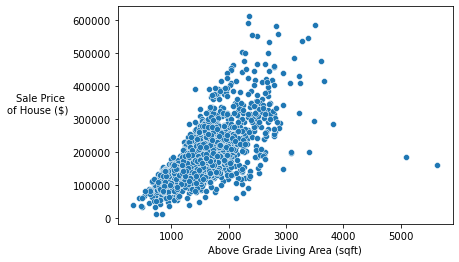

In [35]:
# Checking for outliers according to the readme
scatter=sns.scatterplot(x=df.gr_liv_area, y=df.saleprice,)
scatter.set_ylabel('Sale Price \nof House ($)', 
                   rotation=0, 
                   horizontalalignment='right')
scatter.set_xlabel('Above Grade Living Area (sqft)')

In [36]:
# Isolating the outliers
df[df.gr_liv_area > 4000]
df = df[df.gr_liv_area < 4000]

 Although the readme file mentioned that there were 5 outliers with more than 4000sqft of above grade living area, we only managed to find and remove 2. It appears that the other 3 observations have already been removed.

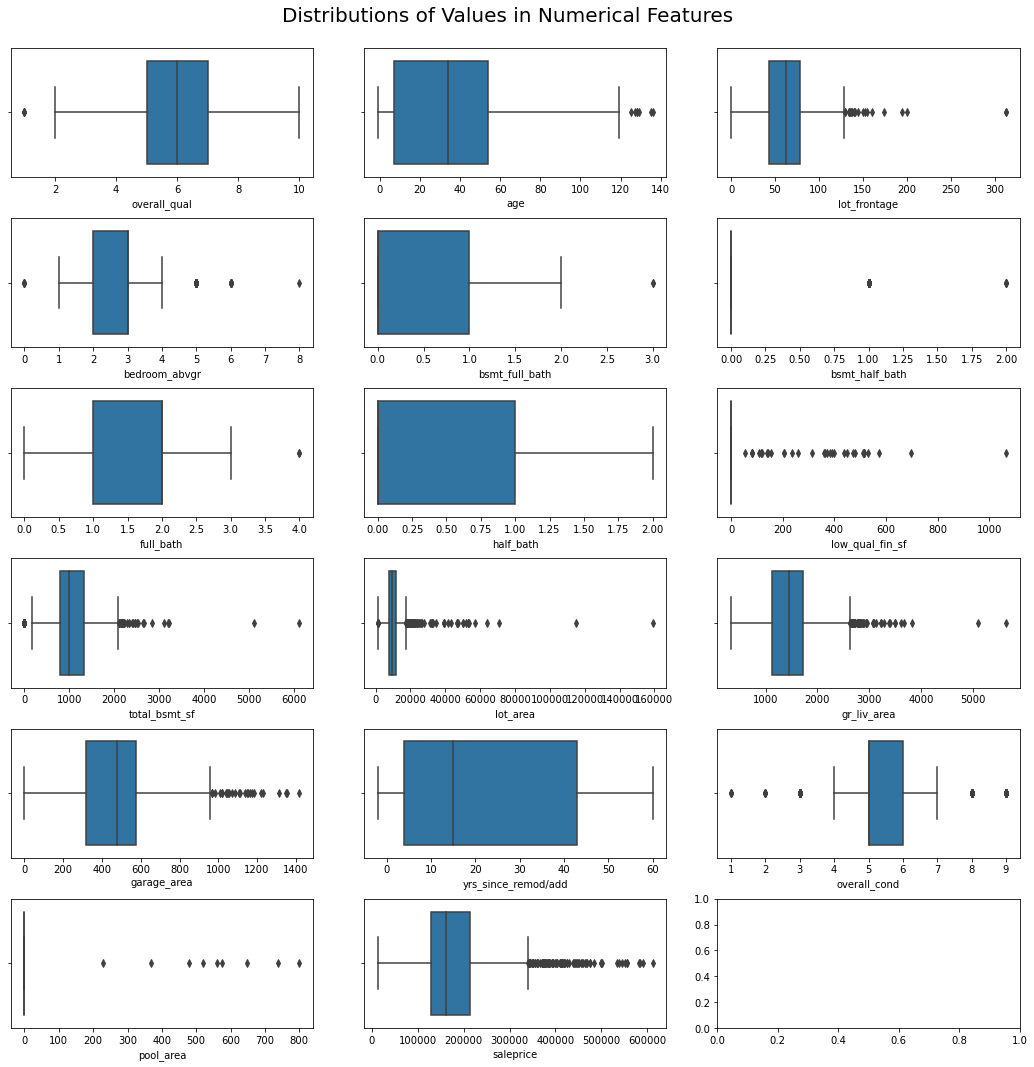

In [37]:
fig, axes = plt.subplots(6, 3, figsize=(15,15))

fig.suptitle('Distributions of Values in Numerical Features', size=20)

plt.tight_layout(pad=2)

for _ in range(df_nums.shape[1]):
    box = sns.boxplot(x=df_nums[df_nums.columns[_]], ax=axes[(_ // 3),(_ % 3)])

In [38]:
df[df['saleprice'] > (df['saleprice'].quantile(q=.75) * 1.5)].count()[0]

124

In [39]:
df[df['lot_area'] > (df['lot_area'].quantile(q=.75) * 1.5)].count()[0]

89

In [40]:
df[df['low_qual_fin_sf'] > (df['low_qual_fin_sf'].quantile(q=.75) * 1.5)].count()[0]

33

Creating a boxplot for all of our features with numerical values uncovered that some features (e.g. `lot_area`, `low_qual_fin_sf`, `total_bsmt_sf`, `garage_area`, `saleprice`) held a lot of outliers (below or above 1.5 times the lower and upper bound of the IQR). <br>Due to the sheer number of outliers (`saleprice` has 124 outliers out of an original 2049), we have decided to ignore these for the time being, but we will consider dropping these outliers if our models are not accurate enough.

### Checking number of unique values
- Now that we have removed all the null values, we have to ensure that there will not be too many columns when we get dummies<br>
- Check each feature that has string values to see the number of unique values they have

In [41]:
vc_sum = 0
for category in categorical:
    print(df[category].value_counts().shape[0])
    vc_sum += df[category].value_counts().shape[0]
print(f'There are a total of {vc_sum} unique values in our dataframe')

7
28
9
8
8
5
2
5
3
5
16
There are a total of 96 unique values in our dataframe


96 unique values will be small enough to work with.

## Exploratory Data Analysis<a name="eda"></a>
---

### Heatmap<a name="heatmap"></a>


Let's take a look at a heatmap to see the correlation between our features with numerical values:

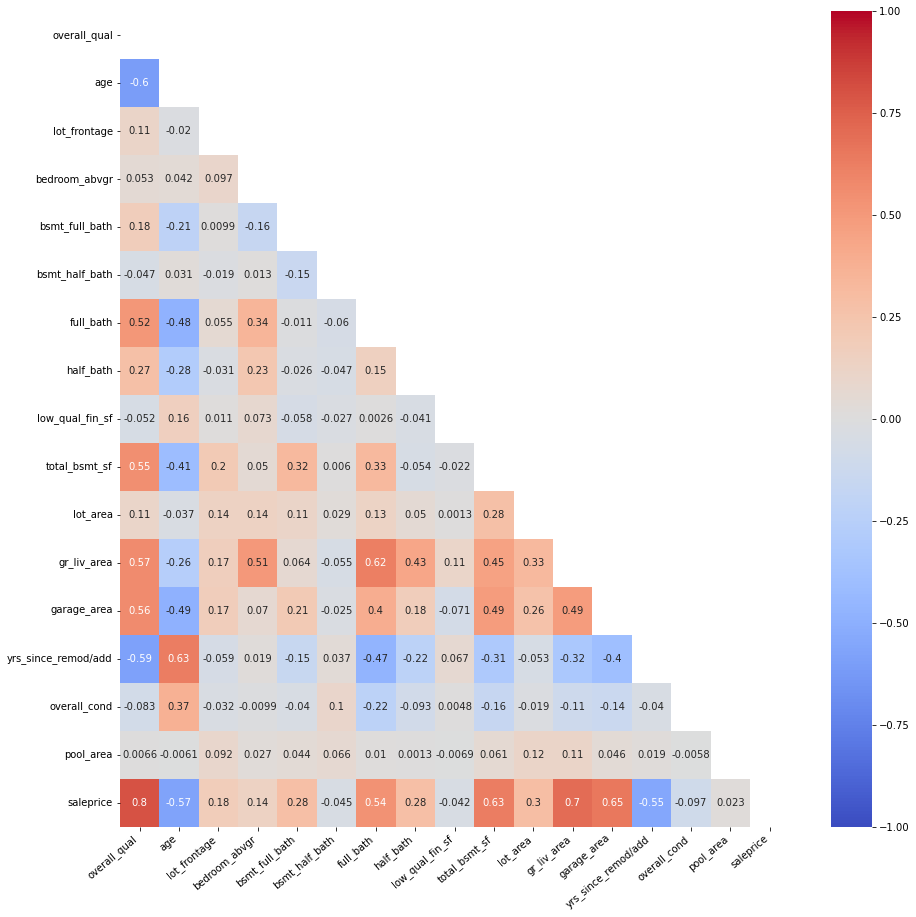

In [42]:
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(df_nums.corr(),
                    annot=True,
                    mask=np.triu(df_nums.corr()),
                    cmap='coolwarm', 
                    center=0,
                    vmax=1,
                    vmin=-1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), 
                        rotation = 40, 
                        horizontalalignment='right')
 
heatmap_fig = heatmap.get_figure()
heatmap_fig.savefig('heatmap.png', dpi=200)

#### Heatmap analysis
- The only row we are really concerned with is the `saleprice`, at the very bottom
- `saleprice` has a high positive correlation (0.7 $\leqslant$ corr) with both `overall_qual` and `gr_living_area`
- `saleprice` has a medium positive correlation (0.5 $\leqslant$ corr $\lt$ 0.7) with `full_bath`, `total_bsmt_sf`, and `garage_area`
- `saleprice` has little positive correlation (0.1 $\leqslant$ corr $\lt$ 0.5 ) with `lot_frontage`, `bedroom_abvgr`, `bsmt_full_bath`, `half_bath`, `lot_area`
- `saleprice` has close to no correlation (-0.1 $\leqslant$ corr $\lt$ 0.1 ) with `bsmt_half_bath`, `low_qual_fin_sf`, `overall_cond`, `pool_area`
- `saleprice` has a medium negative correlation (-0.5 $\geqslant$ corr $\gt$ 0.7) with `age` and `yrs_since_remod/add`, as the value of a house decreases with age and how long since it has been renovated 
<br><br>
From the heatmap, we can see that although we have a good number features that would be able to predict the home value, we also have a number of features that don't seem to hold any predictive value for our model. However, we will not be using these results to drop any features, but just to be more aware of which features to look out for and expect in our lasso model later on. <br><br>
Another point to note is that this heatmap only displays the correlations of the features with numerical values, so there could still be other features with categorical values that are better predictors than what we can see here.

### Feature Selection with Lasso Regression<a name="featureselection"></a>

In [43]:
# Creating a dataframe with dummies of features with string values
df_dum = pd.get_dummies(df, columns=categorical)

In [44]:
X = df_dum.drop(columns='saleprice')
y = df_dum['saleprice']

For our train-test split, we will be using a test-size of 20% in order to ensure we have a fair representation in our testing set while have a good amount of data to train our model with.

In [45]:
# Train-test-split with test-size = 0.2
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

In [46]:
# Scaling X_train and X_test for Lasso regression
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

In [47]:
# making lasso regression with cross validation
lasso1 = LassoCV(n_alphas=200)
lasso1.fit(Z_train, y_train)
lasso1.predict(Z_holdout)

# mean squared error for training set
mean_squared_error(y_train, lasso1.predict(Z_train))

# features
features = [col for col in X.columns]

In [48]:
lasso1.alpha_

364.3381232912328

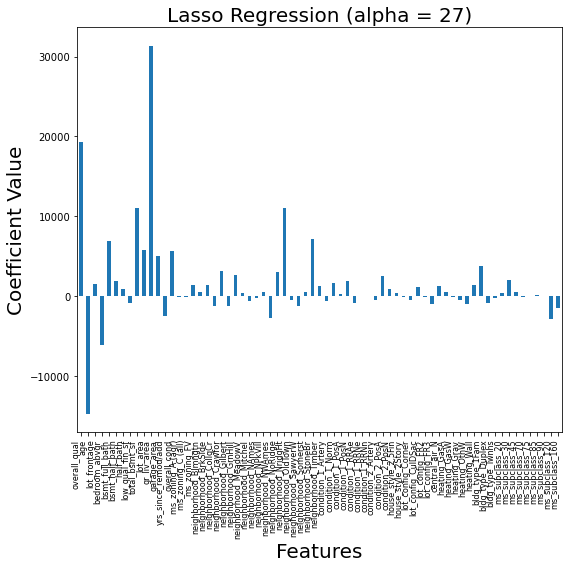

In [49]:
# 1st lasso regression for feature selection (lasso alpha = 267)
lasso1_features = pd.Series(lasso1.coef_, index=features)

# ignore dummy features that have been zeroed
lasso1_features = lasso1_features.loc[lasso1_features!=0]

lasso1_features.plot.bar(figsize=(8,8))
lasso1_features.plot
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient Value', size=20)
plt.title('Lasso Regression (alpha = 27)', size=20)
plt.xticks(rotation=90, horizontalalignment='right', size=8)

plt.tight_layout()

plt.savefig('lasso1.png', dpi=200) 

In [50]:
lasso1_features.sort_values()

age                    -14728.591384
bedroom_abvgr           -6112.576091
ms_subclass_120         -2931.027299
neighborhood_NWAmes     -2793.466737
yrs_since_remod/add     -2462.807655
                            ...     
neighborhood_StoneBr     7179.530181
neighborhood_NridgHt    11025.186854
total_bsmt_sf           11054.520488
overall_qual            19271.685498
gr_liv_area             31360.098658
Length: 69, dtype: float64

#### Lasso 2

In [51]:
# vary the lasso alpha to reduce lasso coefficients to 0 to identify the weakest predictors
lasso2 = Lasso(alpha=1000)
lasso2.fit(Z_train, y_train)
lasso2.alpha

1000

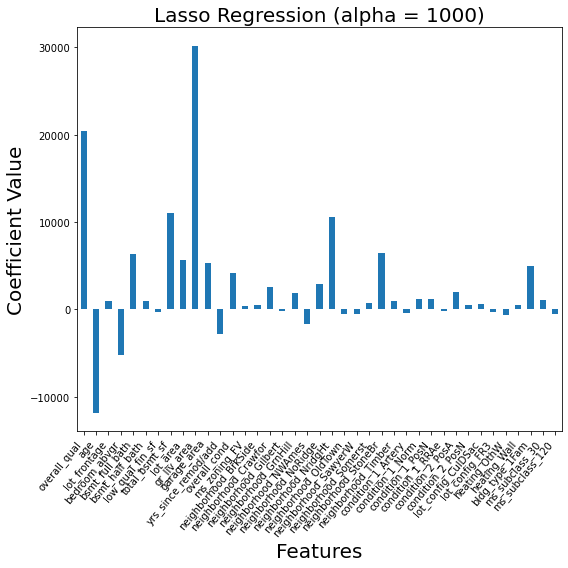

In [52]:
# 2nd lasso regression for feature selection (lasso alpha = 1000)
lasso2_features = pd.Series(lasso2.coef_, index=features)

# ignore dummy features that have been zeroed
lasso2_features = lasso2_features.loc[lasso2_features!=0]

lasso2_features.plot.bar(figsize=(8, 8))
lasso2_features.plot
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient Value', size=20)
plt.title('Lasso Regression (alpha = 1000)', size=20)
plt.xticks(rotation=50, horizontalalignment='right', size=10)

plt.tight_layout()

plt.savefig('lasso2.png', dpi=200) 

In [53]:
lasso2_features.sort_values()

age                    -11857.800457
bedroom_abvgr           -5261.408706
yrs_since_remod/add     -2773.991561
neighborhood_NWAmes     -1642.120286
heating_OthW             -602.803026
neighborhood_OldTown     -484.042280
neighborhood_SawyerW     -476.812459
ms_subclass_120          -471.118342
condition_1_Artery       -443.323565
low_qual_fin_sf          -284.744797
lot_config_FR3           -264.185930
condition_1_RRAe         -224.326335
neighborhood_Gilbert     -207.381571
ms_zoning_FV              368.874540
heating_Wall              480.997650
neighborhood_BrkSide      493.290094
condition_2_PosN          514.951780
lot_config_CulDSac        637.473075
neighborhood_Somerst      771.481068
lot_frontage              913.475187
neighborhood_Timber       999.313807
bsmt_half_bath           1024.846017
ms_subclass_30           1037.157056
condition_1_PosN         1234.736523
condition_1_Norm         1255.600896
neighborhood_GrnHill     1922.361542
condition_2_PosA         1952.314217
n

#### Lasso 3

In [54]:
# vary the lasso alpha to reduce lasso coefficients to 0 to identify the weakest predictors
lasso3 = Lasso(alpha=2000)
lasso3.fit(Z_train, y_train)
lasso3.alpha

2000

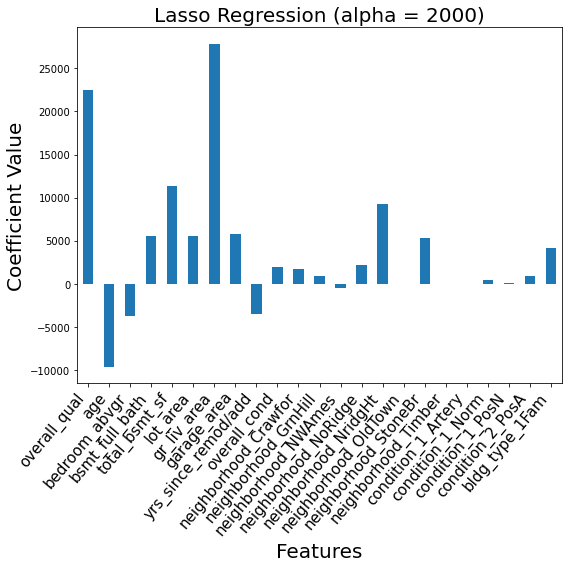

In [55]:
# 3rd lasso regression for feature selection (lasso alpha = 2000)
lasso3_features = pd.Series(lasso3.coef_, index=features)

# ignore dummy features that have been zeroed
lasso3_features = lasso3_features.loc[lasso3_features!=0]

lasso3_features.plot.bar(figsize=(8, 8))
lasso3_features.plot
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient Value', size=20)
plt.title('Lasso Regression (alpha = 2000)', size=20)
plt.xticks(rotation=50, horizontalalignment='right', size=15)

plt.tight_layout()

plt.savefig('lasso3.png', dpi=200) 

In [56]:
lasso3_features.sort_values()

age                     -9617.482098
bedroom_abvgr           -3701.922523
yrs_since_remod/add     -3541.427603
neighborhood_NWAmes      -533.946239
condition_1_Artery        -59.939642
neighborhood_OldTown      -30.014363
neighborhood_Timber         6.667430
condition_1_PosN          121.599960
condition_1_Norm          384.879063
neighborhood_GrnHill      852.682443
condition_2_PosA          865.089638
neighborhood_Crawfor     1731.575305
overall_cond             1966.783164
neighborhood_NoRidge     2146.118718
bldg_type_1Fam           4129.226572
neighborhood_StoneBr     5336.590090
lot_area                 5494.750327
bsmt_full_bath           5562.015440
garage_area              5821.067181
neighborhood_NridgHt     9201.705118
total_bsmt_sf           11320.619691
overall_qual            22458.816198
gr_liv_area             27887.902271
dtype: float64

#### Lasso 4<a name="lasso4"></a>

In [57]:
# vary the lasso alpha to reduce lasso coefficients to 0 to identify the weakest predictors
lasso4 = Lasso(alpha=4000)
lasso4.fit(Z_train, y_train)
lasso4.alpha

4000

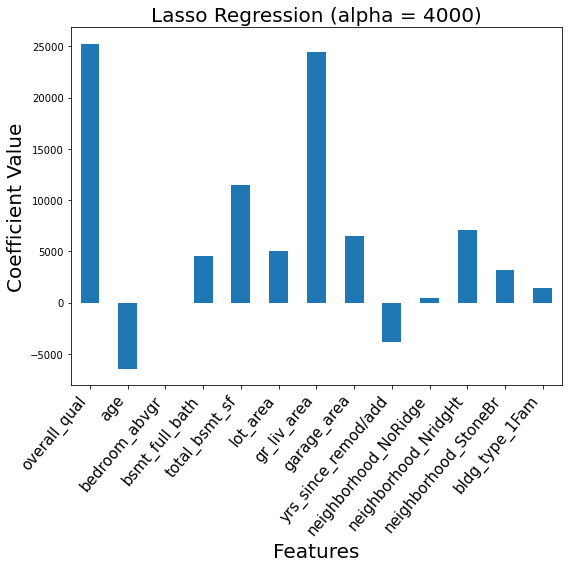

In [58]:
# 3rd lasso regression for feature selection (lasso alpha = 4000)
lasso4_features = pd.Series(lasso4.coef_, index=features)

# ignore dummy features that have been zeroed
lasso4_features = lasso4_features.loc[lasso4_features!=0]

lasso4_features.plot.bar(figsize=(8,8))
lasso4_features.plot
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient Value', size=20)
plt.title('Lasso Regression (alpha = 4000)', size=20)
plt.xticks(rotation=50, horizontalalignment='right', size=15)

plt.tight_layout()

plt.savefig('lasso4.png', dpi=200) 

In [59]:
lasso4_features.sort_values()

age                     -6502.229944
yrs_since_remod/add     -3830.405519
bedroom_abvgr              -6.548956
neighborhood_NoRidge      477.469871
bldg_type_1Fam           1420.256979
neighborhood_StoneBr     3188.375449
bsmt_full_bath           4590.157753
lot_area                 4992.241945
garage_area              6452.126222
neighborhood_NridgHt     7131.100387
total_bsmt_sf           11488.429754
gr_liv_area             24478.465614
overall_qual            25273.557377
dtype: float64

In [60]:
# Number of features set to 0
lasso4_features.value_counts()

 25273.557377    1
-6502.229944     1
-6.548956        1
 4590.157753     1
 11488.429754    1
 4992.241945     1
 24478.465614    1
 6452.126222     1
-3830.405519     1
 477.469871      1
 7131.100387     1
 3188.375449     1
 1420.256979     1
dtype: int64

Through lasso regression, we have reduced the number of dummy features from 128 to 13.

In [61]:
# Identifying coefficients remaining
lasso4_features.loc[lasso4_features!=0]

overall_qual            25273.557377
age                     -6502.229944
bedroom_abvgr              -6.548956
bsmt_full_bath           4590.157753
total_bsmt_sf           11488.429754
lot_area                 4992.241945
gr_liv_area             24478.465614
garage_area              6452.126222
yrs_since_remod/add     -3830.405519
neighborhood_NoRidge      477.469871
neighborhood_NridgHt     7131.100387
neighborhood_StoneBr     3188.375449
bldg_type_1Fam           1420.256979
dtype: float64

In [62]:
df['saleprice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [63]:
# Exploring why the coefficent for bedroom_abvgr is negative
df_nums[df_nums['bedroom_abvgr']==5].mean()

overall_qual                5.975610
age                        56.414634
lot_frontage               61.024390
bedroom_abvgr               5.000000
bsmt_full_bath              0.219512
bsmt_half_bath              0.024390
full_bath                   2.121951
half_bath                   0.512195
low_qual_fin_sf            26.341463
total_bsmt_sf            1077.926829
lot_area                12815.853659
gr_liv_area              2353.609756
garage_area               500.000000
yrs_since_remod/add        27.512195
overall_cond                5.585366
pool_area                  12.658537
saleprice              203885.951220
dtype: float64

### Feature Selection Conclusion

- These 13 dummy features have the strongest predictive power out of the 128 we selected. Out of these 13 dummy features, four of them were dummified from `neighbourhood` and `bldg_type`, which gives us 11 features out of our original 27.
<br><br>
- The strongest predictor for the value of a house seems to the overall quality of the house `qual_overall`, just edging out the size of the living area above grade `gr_living_area` in second, with the size of the basement area `total_bsmt_sf` coming comfortably in third.
<br><br>
- Both the coefficients `yrs since remod/add` and `age` are negative, as the house would depreciate in value the longer since it has been renovated or built
<br><br>
- An interesting point to note is that `bedroom_abvgr` coefficient is also negative, which implies that the home value decreases as the number of bedrooms above grade increases, which is contrary to our heatmap showing a small positive correlation between `bedroom_abvgr` and `saleprice`
<br><br>
- From some exploration of the means of our data, it seems that the mean `saleprice` of a home only increases with the number of `bedroom_abvgr` until it reaches a peak of 4 bedrooms, despite the average `gr_liv_area` increasing accordingly. This is likely the reason for the `bedroom_abvgr` coefficient being negative.
<br><br>
To add to our last point, in all of our feature-selecting lasso regressions, `bedroom_abvgr` coefficient was negative even though it held a positive value in our heatmap. This is because the heatmap correlation just displays the relationship between `bedroom_abvgr` and `saleprice` without consideration of other predictors while the lasso regression is taking all of the features that we have selected into account. What this means is that while in general the more bedrooms a house has, the greater its value, this is more likely nothing to do with the number of bedrooms, but with the relationship that `bedroom_abvgr` has with other predictors, the chief of which would be one of the strongest predictors of `gr_liv_area`. 
<br><br>


From this, we can conclude that the 11 features that we should be using for our models are:-

1) `overall_qual`<br>
2) `age`<br>
3) `bedroom_abvgr` <br>
4) `bsmt_full_bath`<br>
5) `total_bsmt_sf`<br>
6) `lot_area`<br>
7) `gr_liv_area`<br>
8) `garage_area`<br>
9) `yrs_since_remod/add` <br>
10) `neighborhood`<br>
11) `bldg_type`<br>

- Based on our chart "**Coefficients of features for Lasso Regression (alpha = 4000)**", our location feature (`neighbourhood`) does not seem to be as impactful on our target (`saleprice`) as the overall quality (`overall_qual`)of the house. With this in mind, we will be creating 3 models with different predictors:-

    1) L<sup>3</sup>'s model: regression of `saleprice` with just `neighbourhood`, and `gr_living_area` as features<br>
    2) 'Quality' Model: regression of `saleprice` with just `overall_qual`, and `gr_living_area` as features<br>
    3) Optimal Model: regression of `saleprice` with all 11 of the features we have found to be strong predictors

### L<sup>3</sup>'s Model<a name="lmodel"></a>
---

#### Defining parameters for L<sup>3</sup>'s non-regularized models

For linear and polynomial regression we need one column value of our dummies as reference to prevent multicollinearity:

In [64]:
# Defining parameters for L**3's model
X = df[[  
    'gr_liv_area',
    'neighborhood',
]]

# Make into dummies
X = pd.get_dummies(X, columns=['neighborhood'], drop_first=True)

y = df['saleprice']

In [65]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [66]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Linear Regression
---

In [67]:
# instatiating the model
lr = LinearRegression()

# fitting the model to the training set
lr.fit(Z_train, y_train)

LinearRegression()

##### Training Set MSE

In [68]:
# predicting target values for training set
lr.predict(Z_train)

array([160052.25996622, 165838.99915815, 111798.84992697, ...,
       216857.39944507, 104768.7090264 , 204176.98027041])

In [69]:
# training set mean squared error
lr_mse_train_LLL = mean_squared_error(y_train, lr.predict(Z_train))

##### Holdout Set MSE

In [70]:
# predicting target values for holdout set
lr.predict(Z_holdout)

array([113365.21580926, 221377.93348079,  93592.20686401, 156600.9142426 ,
        99096.84830903, 282543.35866556, 204337.04839669, 224622.19964176,
       216383.44495269, 100847.06204516, 178032.05253877, 314286.29391959,
       123958.43675596, 115197.90565811, 147711.55721878, 141490.25050549,
       218440.46367149, 201435.20381753, 213097.81174563, 209702.87982252,
       165884.41020275, 107878.6080338 , 130373.51039824, 214170.66122225,
       153759.51998095, 195002.06702552, 142103.18155394, 217281.82560985,
       258504.18313295, 117634.98261042, 132023.79294373, 276017.37761839,
       172831.17333837, 209372.97537165, 121695.98345315, 299277.42883192,
       214466.429627  , 192148.1188241 , 130703.41484911, 135387.01816435,
       184935.4905884 , 223146.48619557, 114208.19230549, 148683.96771279,
       222878.99312424, 116747.41669006, 189038.87820111, 193822.49273876,
       135063.18279542, 126644.55021623,  93592.20686401, 148748.14842469,
       159383.59448174, 1

In [71]:
# Holdout set mean squared error
lr_mse_hold_LLL = mean_squared_error(y_holdout, lr.predict(Z_holdout))

##### Cross Val Score

In [72]:
# cross val score
lr_cvs_LLL = cross_val_score(lr, 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Polynomial Regression
---

In [73]:
# outling poly parameters
poly = PolynomialFeatures(degree=2, include_bias=True)

# fitting the model to the training set
X_train_poly = poly.fit_transform(X_train)
X_holdout_poly = poly.transform(X_holdout)

# instatiating the model
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

##### Training Set MSE

In [74]:
# predicting target values for training set
lr.predict(X_train_poly)

array([149191.17624599, 166441.37285081, 122175.2312611 , ...,
       158283.53313713, 119989.77460695, 204302.52932031])

In [75]:
# training set mean squared error
poly_mse_train_LLL = mean_squared_error(y_train, lr.predict(X_train_poly))

##### Holdout Set MSE

In [76]:
# predicting target values for holdout set
lr.predict(X_holdout_poly)

array([114809.35910331, 216478.36202262,  98316.09837304, 149201.59616084,
       102538.79854976, 277470.39126172, 186383.22986807, 219603.41498652,
       219780.22812862, 106626.57351148, 171489.19846609, 305719.21553392,
       123994.21252154, 117384.80967218, 145272.41598588, 142147.28981637,
       196676.27065293, 187173.98725817, 205943.83298907, 211296.87293167,
       148602.71349768, 105764.29919863, 128912.48123298, 211840.69543015,
       145829.95168159, 177238.73639411, 140214.069399  , 213300.87981247,
       206509.28793324, 126619.30238085, 139100.85585657, 229956.13148692,
       163874.13194222, 210878.72195458, 128766.50134919, 287002.70933111,
       207384.79783105, 177441.08637449, 129164.80828303, 137993.36057131,
       163116.75158663, 228398.98493284, 116638.4017642 , 152474.65438065,
       220493.13434915, 125462.60595968, 188772.02585887, 192575.20854587,
       134948.94834368, 132086.9174296 ,  98316.09837304, 147119.80853526,
       164862.8654249 , 1

In [77]:
# Holdout set mean squared error
poly_mse_hold_LLL = mean_squared_error(y_holdout, lr.predict(X_holdout_poly))

##### Cross Val Score

In [78]:
# cross val score 
poly_cvs_LLL = cross_val_score(lr, 
                X_train_poly, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

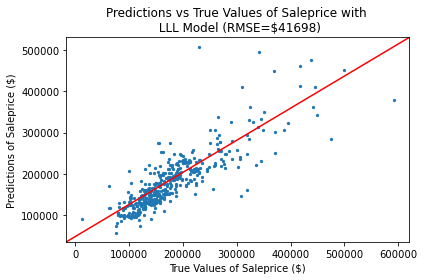

In [79]:
## The line / model

fig, ax = plt.subplots()
ax.scatter(y_holdout, lr.predict(X_holdout_poly), s=5)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title("Predictions vs True Values of Saleprice with \n LLL Model (RMSE=$41698)")
plt.xlabel("True Values of Saleprice ($)")
plt.ylabel("Predictions of Saleprice ($)")

plt.tight_layout()

fig.savefig('p_vs_t_lll.png', dpi=200) 

In [80]:
# residuals of best iopt regression for jointplot
lll_residuals = y_holdout - lr.predict(X_holdout_poly)

#### Defining parameters for L<sup>3</sup>'s regularized models
---

In [81]:
# Defining parameters for L**3's model
X = df[[  
    'gr_liv_area',
    'neighborhood',
]]

# Make into dummies
X = pd.get_dummies(X, columns=['neighborhood'])

y = df['saleprice']

In [82]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [83]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Ridge Regression
---

In [84]:
# instatiating the model
ridge = RidgeCV(alphas=np.logspace(.1, 10, 200))

# fitting the model to the training set
ridge.fit(Z_train, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.41172057e+00, 1.58306041e+00, 1.77519568e+00,
       1.99065031e+00, 2.23225456e+00, 2.50318220e+00, 2.80699220e+00,
       3.14767547e+00, 3.52970730e+00, 3.95810615e+00, 4.43849956e+00,
       4.97719808e+00, 5.58127817e+00, 6.25867517e+00, 7.01828751e+00,
       7.87009364e+00, 8.82528305e+00, 9.89640333e+00, 1.10975250e+01,
       1.24444261e+01, 1.39548000e+0...
       7.17428945e+08, 8.04502945e+08, 9.02145074e+08, 1.01163798e+09,
       1.13441999e+09, 1.27210398e+09, 1.42649862e+09, 1.59963206e+09,
       1.79377862e+09, 2.01148866e+09, 2.25562205e+09, 2.52938580e+09,
       2.83637611e+09, 3.18062569e+09, 3.56665668e+09, 3.99954005e+09,
       4.48496227e+09, 5.02929995e+09, 5.63970362e+09, 6.32419169e+09,
       7.09175574e+09, 7.95247866e+09, 8.91766711e+09, 1.00000000e+10]))

In [85]:
ridge.alpha_
print(f'The optimal value of alpha for our ridge regression is {ridge.alpha_}')

The optimal value of alpha for our ridge regression is 22.06574489648446


##### Training Set MSE

In [86]:
# predicting target values for training set
ridge.predict(Z_train)

array([160303.31380476, 165903.95524037, 112386.61749686, ...,
       216208.48692396, 105354.13077722, 203920.16232396])

In [87]:
# training set mean squared error
ridge_mse_train_LLL = mean_squared_error(y_train, ridge.predict(Z_train))

##### Holdout Set MSE

In [88]:
# predicting target values for holdout set
ridge.predict(Z_holdout)

array([113967.47273435, 221147.52685664,  94326.18666224, 156882.3732939 ,
        99863.33293282, 281542.44480763, 203859.70915768, 224385.0119755 ,
       215986.13163394, 101770.24320235, 178076.16049109, 313067.81698938,
       124462.324034  , 115955.90982355, 147942.04809667, 141736.2725752 ,
       217800.7953199 , 201265.87558472, 212618.82290673, 209382.45924132,
       165855.79368178, 108569.71691225, 130956.84464137, 213956.71130778,
       153781.06165648, 194906.78365108, 142398.22435965, 217129.12502558,
       257320.12262729, 118072.3146445 , 132477.95917893, 275239.37266619,
       172716.46404678, 209056.35196267, 122169.8358563 , 298797.68173373,
       214147.11309133, 192020.43256825, 131282.95192002, 135703.2879202 ,
       184598.19948874, 222671.33084623, 114977.5879876 , 148946.37675066,
       222462.84869686, 117278.22667658, 189058.39016212, 193786.94570252,
       135724.43101619, 127061.44503603,  94326.18666224, 148910.63270546,
       159897.29762281, 1

In [89]:
# Holdout set mean squared error
ridge_mse_hold_LLL = mean_squared_error(y_holdout, ridge.predict(Z_holdout))

##### Cross val Score

In [90]:
# cross val score 
ridge_cvs_LLL = cross_val_score(Ridge(ridge.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Lasso Regression
---

In [91]:
# instatiating the model
lasso = LassoCV(n_alphas=200)

# fitting the model to the training set
lasso.fit(Z_train, y_train)

LassoCV(n_alphas=200)

In [92]:
lasso.alpha_
print(f'The optimal value of alpha for our lasso regression is {lasso.alpha_}')

The optimal value of alpha for our lasso regression is 119.61334978646643


##### Training Set MSE

In [93]:
# predicting target values for training set
lasso.predict(Z_train)

array([159519.58753304, 165243.69691773, 111983.86222678, ...,
       218375.56480142, 105157.78783247, 203781.54624035])

In [94]:
# training set mean squared error
lasso_mse_train_LLL = mean_squared_error(y_train, lasso.predict(Z_train))

##### Holdout Set MSE

In [95]:
# predicting target values for holdout set
lasso.predict(Z_holdout)

array([113923.50947738, 220364.37953221,  94891.99400624, 157086.82772152,
        99610.76395147, 282922.80288191, 204809.87656249, 225264.33583507,
       216025.97593882, 101159.56774742, 177555.30154836, 313794.18531893,
       124382.87314829, 115555.04590644, 148209.87148045, 141767.61014198,
       218957.15682221, 200896.49645754, 212649.49568276, 209324.6326579 ,
       167252.79122061, 108528.93935144, 130777.85039643, 214337.45004385,
       154300.97189255, 194443.35107592, 142584.0524298 , 217901.13148936,
       259371.41592673, 118064.07859572, 131323.31734764, 275406.24356157,
       173206.01071914, 208993.70212551, 121911.77819851, 298405.80632763,
       213968.25248699, 192744.59258666, 131108.78092882, 135645.39529275,
       185573.90720351, 222810.05185284, 114562.25430926, 148035.30923339,
       222406.98106297, 116947.82021265, 188541.3931587 , 193339.88587837,
       135982.24096481, 126875.73618438,  94891.99400624, 149048.08185459,
       159822.82305472, 1

In [96]:
# Holdout set mean squared error
lasso_mse_hold_LLL = mean_squared_error(y_holdout, lasso.predict(Z_holdout))

##### Cross val Score

In [97]:
# cross val score
lasso_cvs_LLL = cross_val_score(Lasso(lasso.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Elastic Net Regression
---

In [98]:
# instatiating the model
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=200)

# fitting the model to the training set
enet.fit(Z_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_alphas=200)

In [99]:
enet.alphas_ 

array([[5.77027802e+05, 5.57341474e+05, 5.38326779e+05, ...,
        6.18511092e+02, 5.97409487e+02, 5.77027802e+02],
       [1.15405560e+05, 1.11468295e+05, 1.07665356e+05, ...,
        1.23702218e+02, 1.19481897e+02, 1.15405560e+02],
       [8.24325431e+04, 7.96202105e+04, 7.69038256e+04, ...,
        8.83587274e+01, 8.53442125e+01, 8.24325431e+01],
       ...,
       [6.07397686e+04, 5.86675235e+04, 5.66659768e+04, ...,
        6.51064307e+01, 6.28852092e+01, 6.07397686e+01],
       [5.82856365e+04, 5.62971186e+04, 5.43764424e+04, ...,
        6.24758679e+01, 6.03443927e+01, 5.82856365e+01],
       [5.77027802e+04, 5.57341474e+04, 5.38326779e+04, ...,
        6.18511092e+01, 5.97409487e+01, 5.77027802e+01]])

In [100]:
enet.l1_ratio_

1.0

The optimal l1 ratio found our elastic net was found to be 1, which means it is just the same as a lasso regularisation. 

In [101]:
enet.alpha_
print(f'The optimal value of alpha for our elastic net regression is {enet.alpha_}')

The optimal value of alpha for our elastic net regression is 119.61334978646643


##### Training Set MSE

In [102]:
# predicting target values for training set
enet.predict(Z_train)

array([159519.58753304, 165243.69691773, 111983.86222678, ...,
       218375.56480142, 105157.78783247, 203781.54624035])

In [103]:
# training set mean squared error
elasticnet_mse_train_LLL = mean_squared_error(y_train, enet.predict(Z_train))

Exactly the same as the Training set MSE for our lasso regression.

##### Holdout Set MSE

In [104]:
# predicting target values for holdout set
enet.predict(Z_holdout)

array([113923.50947738, 220364.37953221,  94891.99400624, 157086.82772152,
        99610.76395147, 282922.80288191, 204809.87656249, 225264.33583507,
       216025.97593882, 101159.56774742, 177555.30154836, 313794.18531893,
       124382.87314829, 115555.04590644, 148209.87148045, 141767.61014198,
       218957.15682221, 200896.49645754, 212649.49568276, 209324.6326579 ,
       167252.79122061, 108528.93935144, 130777.85039643, 214337.45004385,
       154300.97189255, 194443.35107592, 142584.0524298 , 217901.13148936,
       259371.41592673, 118064.07859572, 131323.31734764, 275406.24356157,
       173206.01071914, 208993.70212551, 121911.77819851, 298405.80632763,
       213968.25248699, 192744.59258666, 131108.78092882, 135645.39529275,
       185573.90720351, 222810.05185284, 114562.25430926, 148035.30923339,
       222406.98106297, 116947.82021265, 188541.3931587 , 193339.88587837,
       135982.24096481, 126875.73618438,  94891.99400624, 149048.08185459,
       159822.82305472, 1

In [105]:
# Holdout set mean squared error
elasticnet_mse_hold_LLL = mean_squared_error(y_holdout, enet.predict(Z_holdout))

Exactly the same as the Holdout set MSE for our lasso regression.

##### Cross val Score

In [106]:
# cross val score
elasticnet_cvs_LLL = cross_val_score(ElasticNet(enet.alpha_, l1_ratio=1), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Summary<a name="lmodelsummary"></a>
---

In [107]:
print('Linear Regression')
print(f"LLL model's linear regression on the training data has a MSE of {lr_mse_train_LLL}")
print(f"LLL model's linear regression on the holdout data has a MSE of {lr_mse_hold_LLL}")
print(f"LLL model's linear regression has a cross validation score of {lr_cvs_LLL}")
print('')
print('Polynomial Regression')
print(f"LLL model's polynomial regression on the training data has a MSE of {poly_mse_train_LLL}")
print(f"LLL model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_LLL}")
print(f"LLL model's polynomial regression has a cross validation score of {poly_cvs_LLL}")
print('')
print('Ridge Regression')
print(f"LLL model's ridge regression on the training data has a MSE of {ridge_mse_train_LLL}")
print(f"LLL model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_LLL}")
print(f"LLL model's ridge regression has a cross validation score of {ridge_cvs_LLL}")
print('')
print('Lasso Regression')
print(f"LLL model's lasso regression on the training data has a MSE of {lasso_mse_train_LLL}")
print(f"LLL model's lasso regression on the holdout data has a MSE of {lasso_mse_hold_LLL}")
print(f"LLL model's lasso regression has a cross validation score of {lasso_cvs_LLL}")
print('')
print('Elastic Net Regression')
print(f"LLL model's elastic net regression on the training data has a MSE of {elasticnet_mse_train_LLL}")
print(f"LLL model's elastic net regression on the holdout data has a MSE of {elasticnet_mse_hold_LLL}")
print(f"LLL model's elastic net regression has a cross validation score of {elasticnet_cvs_LLL}")
print('')

Linear Regression
LLL model's linear regression on the training data has a MSE of 1520319540.3332422
LLL model's linear regression on the holdout data has a MSE of 1740570170.8479311
LLL model's linear regression has a cross validation score of -1594152477.8154638

Polynomial Regression
LLL model's polynomial regression on the training data has a MSE of 1307161190.1881752
LLL model's polynomial regression on the holdout data has a MSE of 1738764633.4930825
LLL model's polynomial regression has a cross validation score of -1454138891.9345508

Ridge Regression
LLL model's ridge regression on the training data has a MSE of 1520756925.3654342
LLL model's ridge regression on the holdout data has a MSE of 1738390778.5476885
LLL model's ridge regression has a cross validation score of -1600629208.1021323

Lasso Regression
LLL model's lasso regression on the training data has a MSE of 1520703220.7092102
LLL model's lasso regression on the holdout data has a MSE of 1737728997.1183999
LLL model'

#### L<sup>3</sup>'s Model Analysis
- Polynomial regression has the best cross validation score, and the lowest mean squared error on the training data , and its cross validation score is not that much worse than the best score from the lasso regression
- Polynomial regression is the best regression for our Improved Model

### 'Quality' Model<a name="qualitymodel"></a>
---

For the 'Quality' Model, we are only using `overall_qual` and `gr_liv_area` as our features to prove that `overall_qual` is a better price predictor than `neighborhood`

#### Defining parameters for the improved model's non-regularized models

Since all our features are numerical for our improved model, we do not need to dummify our features

In [108]:
# Defining parameters for our improved model
X = df[[
    'overall_qual', 
    'gr_liv_area',
]]

y = df['saleprice']

In [109]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [110]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Linear Regression
---

In [111]:
# instatiating the model
lr = LinearRegression()

# fitting the model to the training set
lr.fit(Z_train, y_train)

LinearRegression()

##### Training Set MSE

In [112]:
# predicting target values for training set
lr.predict(Z_train)

array([114206.19816315, 166207.86393744,  73941.71362457, ...,
       244584.01404686,  67014.85256743, 212886.10871411])

In [113]:
# training set mean squared error
lr_mse_train_qual = mean_squared_error(y_train, lr.predict(Z_train))

##### Holdout Set MSE

In [114]:
# predicting target values for holdout set
lr.predict(Z_holdout)

array([119786.16957029, 232063.25182599, 146196.93199461, 133846.2342483 ,
       140873.51099699, 293827.76291877, 242453.54341169, 218800.69788975,
       222378.47386648, 122672.36167743, 192554.48875937, 264118.12325982,
        96774.70007216, 166015.45113029, 211795.76947363,  97031.25048168,
       253421.07341882, 229227.26756463, 170775.56346308, 249366.47471222,
       182178.12693027, 136012.98297265, 177816.76996837, 240657.69054503,
       137295.73502027, 192041.38794033, 110884.97259595, 213092.45127785,
       218750.49004397, 109203.46517745, 107728.30032269, 202175.1291165 ,
       153586.68602501, 216926.7776641 , 146004.51918746, 290414.54023598,
       207177.86210221, 225855.83415165, 178073.3203779 , 124468.21454409,
       161539.74872023, 195454.61062311, 133062.65326313, 152867.24264222,
       245903.04418366, 109973.11640602, 185513.28225408, 189233.26319217,
       148327.40262978, 117669.62869172, 146196.93199461, 167041.65276839,
       168067.85440648,  

In [115]:
# Holdout set mean squared error
lr_mse_hold_qual = mean_squared_error(y_holdout, lr.predict(Z_holdout))

##### Cross Val Score

In [116]:
# cross val score
lr_cvs_qual = cross_val_score(lr, 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Polynomial Regression
---

In [117]:
# outling poly parameters
poly = PolynomialFeatures(degree=2, include_bias=True)

# fitting the model to the training set
X_train_poly = poly.fit_transform(X_train)
X_holdout_poly = poly.transform(X_holdout)

# instatiating the model
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

##### Training Set MSE

In [118]:
# predicting target values for training set
lr.predict(X_train_poly)

array([116838.84770668, 156100.83305665,  98141.15348788, ...,
       224026.71828108,  94488.3422128 , 203654.35510448])

In [119]:
# training set mean squared error
poly_mse_train_qual = mean_squared_error(y_train, lr.predict(X_train_poly))

##### Holdout Set MSE

In [120]:
# predicting target values for holdout set
lr.predict(X_holdout_poly)

array([120926.69504218, 225170.17978985, 137084.99839339, 126329.12297556,
       131911.69325818, 290218.65802583, 236566.51953073, 202833.52684529,
       214382.44975255, 123020.33455872, 180160.65697846, 269499.60468301,
       109604.47307048, 155921.22897834, 202412.26860912, 109728.24064982,
       248396.93534067, 221868.76514994, 155830.03347571, 249614.02317153,
       170788.62527752, 132513.64553803, 166820.5259995 , 234609.89755024,
       133410.52364784, 179558.6673383 , 116245.57571254, 197988.74460789,
       184635.32804337, 113128.89186171, 112026.81008223, 191365.11536078,
       144557.59101798, 208239.76335345, 136898.85042151, 304030.55148886,
       197129.26673064, 208744.93973917, 167054.83849552, 124315.89844248,
       149835.61739947, 182668.99532053, 130440.2130324 , 143499.22827355,
       244891.62487918, 113702.42286976, 173801.24115861, 177139.1641921 ,
       141008.23439795, 119382.36154306, 137084.99839339, 156878.3902967 ,
       157833.76183221, 1

In [121]:
# Holdout set mean squared error
poly_mse_hold_qual = mean_squared_error(y_holdout, lr.predict(X_holdout_poly))

##### Cross Val Score

In [122]:
poly_cvs_qual = cross_val_score(lr, 
                X_train_poly, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

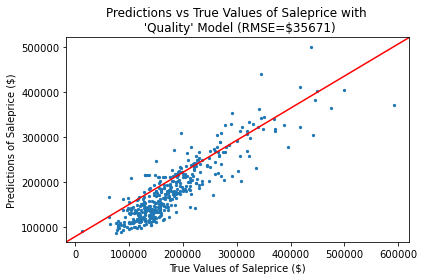

In [123]:
## The line / model

fig, ax = plt.subplots()
ax.scatter(y_holdout, lr.predict(X_holdout_poly), s=5)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title("Predictions vs True Values of Saleprice with \n 'Quality' Model (RMSE=$35671)")
plt.xlabel("True Values of Saleprice ($)")
plt.ylabel("Predictions of Saleprice ($)")

plt.tight_layout()

fig.savefig('p_vs_t_qual.png', dpi=200) 

In [124]:
qual_residuals = y_holdout - lr.predict(X_holdout_poly)

#### Defining parameters for 'Quality' Model's regularized models
---

In [125]:
# Defining parameters 'Quality' Model
X = df[[
    'overall_qual', 
    'gr_liv_area',
]]

y = df['saleprice']

In [126]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [127]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Ridge Regression
---

In [128]:
# instatiating the model
ridge = RidgeCV(alphas=np.logspace(.1, 10, 200))

# fitting the model to the training set
ridge.fit(Z_train, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.41172057e+00, 1.58306041e+00, 1.77519568e+00,
       1.99065031e+00, 2.23225456e+00, 2.50318220e+00, 2.80699220e+00,
       3.14767547e+00, 3.52970730e+00, 3.95810615e+00, 4.43849956e+00,
       4.97719808e+00, 5.58127817e+00, 6.25867517e+00, 7.01828751e+00,
       7.87009364e+00, 8.82528305e+00, 9.89640333e+00, 1.10975250e+01,
       1.24444261e+01, 1.39548000e+0...
       7.17428945e+08, 8.04502945e+08, 9.02145074e+08, 1.01163798e+09,
       1.13441999e+09, 1.27210398e+09, 1.42649862e+09, 1.59963206e+09,
       1.79377862e+09, 2.01148866e+09, 2.25562205e+09, 2.52938580e+09,
       2.83637611e+09, 3.18062569e+09, 3.56665668e+09, 3.99954005e+09,
       4.48496227e+09, 5.02929995e+09, 5.63970362e+09, 6.32419169e+09,
       7.09175574e+09, 7.95247866e+09, 8.91766711e+09, 1.00000000e+10]))

In [129]:
ridge.alpha_
print(f'The optimal value of alpha for our ridge regression is {ridge.alpha_}')

The optimal value of alpha for our ridge regression is 2.5031822023526966


##### Training Set MSE

In [130]:
# predicting target values for training set
ridge.predict(Z_train)

array([114267.2852029 , 166217.09006337,  74050.31788619, ...,
       244564.23475457,  67126.02031938, 212845.44401602])

In [131]:
# training set mean squared error
ridge_mse_train_qual = mean_squared_error(y_train, ridge.predict(Z_train))

##### Holdout Set MSE

In [132]:
# predicting target values for holdout set
ridge.predict(Z_holdout)

array([119845.19157617, 232015.49005748, 146213.56375924, 133932.66906588,
       140892.11285141, 293757.14336159, 242401.93640771, 218790.46047809,
       222334.29623721, 122730.31556234, 192521.34838008, 264025.88248018,
        96874.85431015, 166024.7484643 , 211755.50828791,  97131.30977558,
       253365.40755517, 229147.93918066, 170815.7153319 , 249279.69321752,
       182181.44278687, 136065.9997651 , 177821.69987443, 240606.74814964,
       137348.27709229, 192008.43744921, 110979.90490922, 213084.3263721 ,
       218772.88736874, 109266.40362686, 107791.7847006 , 202138.428334  ,
       153633.19914758, 216884.61759666, 146021.22216016, 290312.56768754,
       207139.30991003, 225842.98577763, 178078.15533986, 124525.5038204 ,
       161583.31857614, 195453.01312326, 133116.76191256, 152881.40586062,
       245817.54443411, 110035.77002318, 185515.36383756, 189233.9680864 ,
       148375.8621061 , 117729.43398631, 146213.56375924, 167050.57032605,
       168076.3921878 ,  

In [133]:
# Holdout set mean squared error
ridge_mse_hold_qual = mean_squared_error(y_holdout, ridge.predict(Z_holdout))

##### Cross val Score

In [134]:
# cross val score 
ridge_cvs_qual = cross_val_score(Ridge(ridge.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Lasso Regression
---

In [135]:
# instatiating the model
lasso = LassoCV(n_alphas=200)

# fitting the model to the training set
lasso.fit(Z_train, y_train)

LassoCV(n_alphas=200)

In [136]:
lasso.alpha_
print(f'The optimal value of alpha for our lasso regression is {lasso.alpha_}')

The optimal value of alpha for our lasso regression is 64.22968213106968


##### Training Set MSE

In [137]:
# predicting target values for training set
lasso.predict(Z_train)

array([114279.49731359, 166227.52471379,  74052.91869336, ...,
       244498.61984562,  67135.3423642 , 212859.26660176])

In [138]:
# training set mean squared error
lasso_mse_train_qual = mean_squared_error(y_train, lasso.predict(Z_train))

##### Holdout Set MSE

In [139]:
# predicting target values for holdout set
lasso.predict(Z_holdout)

array([119851.98935653, 232010.70477231, 146243.41531842, 133877.14361409,
       140927.1298062 , 293692.42704069, 242387.06926606, 218749.86350929,
       222338.90823802, 122734.31282701, 192554.89904301, 264038.67440983,
        96855.29992653, 166035.36981575, 211770.38884624,  97111.50645724,
       253339.8984539 , 229194.5862333 , 170773.03733509, 249306.79889402,
       182176.38125047, 136057.05242392, 177820.8702284 , 240593.62355109,
       137338.08507747, 192042.48598159, 110946.65911557, 213049.268201  ,
       218683.65857782, 109283.46996475, 107810.28241317, 202162.64394462,
       153607.19977754, 216894.51946044, 146051.26042039, 290299.84380758,
       207158.67129347, 225795.54310381, 178077.07675911, 124527.75854198,
       161549.60222954, 195435.0692147 , 133110.67732076, 152904.78511688,
       245848.01072943, 110052.08955688, 185507.0661497 , 189222.06084499,
       148354.96589799, 117738.28547817, 146243.41531842, 167060.19593859,
       168085.02206143,  

In [140]:
# Holdout set mean squared error
lasso_mse_hold_qual = mean_squared_error(y_holdout, lasso.predict(Z_holdout))

##### Cross val Score

In [141]:
# cross val score
lasso_cvs_qual = cross_val_score(Lasso(lasso.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Elastic Net Regression
---

In [142]:
# instatiating the model
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=200)

# fitting the model to the training set
enet.fit(Z_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_alphas=200)

In [143]:
enet.alphas_ 

array([[6.42296821e+05, 6.20383725e+05, 5.99218232e+05, ...,
        6.88472387e+02, 6.64983929e+02, 6.42296821e+02],
       [1.28459364e+05, 1.24076745e+05, 1.19843646e+05, ...,
        1.37694477e+02, 1.32996786e+02, 1.28459364e+02],
       [9.17566888e+04, 8.86262464e+04, 8.56026046e+04, ...,
        9.83531982e+01, 9.49977041e+01, 9.17566888e+01],
       ...,
       [6.76101917e+04, 6.53035500e+04, 6.30756034e+04, ...,
        7.24707776e+01, 6.99983083e+01, 6.76101917e+01],
       [6.48784668e+04, 6.26650227e+04, 6.05270942e+04, ...,
        6.95426654e+01, 6.71700938e+01, 6.48784668e+01],
       [6.42296821e+04, 6.20383725e+04, 5.99218232e+04, ...,
        6.88472387e+01, 6.64983929e+01, 6.42296821e+01]])

In [144]:
enet.l1_ratio_

1.0

The optimal l1 ratio found our elastic net was found to be 1, which means it is just the same as a lasso regularisation. 

In [145]:
enet.alpha_
print(f'The optimal value of alpha for our elastic net regression is {enet.alpha_}')

The optimal value of alpha for our elastic net regression is 64.22968213106968


##### Training Set MSE

In [146]:
# predicting target values for training set
enet.predict(Z_train)

array([114279.49731359, 166227.52471379,  74052.91869336, ...,
       244498.61984562,  67135.3423642 , 212859.26660176])

In [147]:
# training set mean squared error
elasticnet_mse_train_qual = mean_squared_error(y_train, enet.predict(Z_train))

Exactly the same as the Training set MSE for our lasso regression.

##### Holdout Set MSE

In [148]:
# predicting target values for holdout set
enet.predict(Z_holdout)

array([119851.98935653, 232010.70477231, 146243.41531842, 133877.14361409,
       140927.1298062 , 293692.42704069, 242387.06926606, 218749.86350929,
       222338.90823802, 122734.31282701, 192554.89904301, 264038.67440983,
        96855.29992653, 166035.36981575, 211770.38884624,  97111.50645724,
       253339.8984539 , 229194.5862333 , 170773.03733509, 249306.79889402,
       182176.38125047, 136057.05242392, 177820.8702284 , 240593.62355109,
       137338.08507747, 192042.48598159, 110946.65911557, 213049.268201  ,
       218683.65857782, 109283.46996475, 107810.28241317, 202162.64394462,
       153607.19977754, 216894.51946044, 146051.26042039, 290299.84380758,
       207158.67129347, 225795.54310381, 178077.07675911, 124527.75854198,
       161549.60222954, 195435.0692147 , 133110.67732076, 152904.78511688,
       245848.01072943, 110052.08955688, 185507.0661497 , 189222.06084499,
       148354.96589799, 117738.28547817, 146243.41531842, 167060.19593859,
       168085.02206143,  

In [149]:
# Holdout set mean squared error
elasticnet_mse_hold_qual = mean_squared_error(y_holdout, enet.predict(Z_holdout))

Exactly the same as the Holdout set MSE for our lasso regression.

##### Cross val Score

In [150]:
# cross val score
elasticnet_cvs_qual = cross_val_score(ElasticNet(enet.alpha_, l1_ratio=1), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Summary<a name="qualitymodelsummary"></a>
---

In [151]:
print('Linear Regression')
print(f"The 'Quality' model's linear regression on the training data has a MSE of {lr_mse_train_qual}")
print(f"The 'Quality' model's linear regression on the holdout data has a MSE of {lr_mse_hold_qual}")
print(f"The 'Quality' model's linear regression has a cross validation score of {lr_cvs_qual}")
print('')
print('Polynomial Regression')
print(f"The 'Quality' model's polynomial regression on the training data has a MSE of {poly_mse_train_qual}")
print(f"The 'Quality' model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_qual}")
print(f"The 'Quality' model's polynomial regression has a cross validation score of {poly_cvs_qual}")
print('')
print('Ridge Regression')
print(f"The 'Quality' model's ridge regression on the training data has a MSE of {ridge_mse_train_qual}")
print(f"The 'Quality' model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_qual}")
print(f"The 'Quality' model's ridge regression has a cross validation score of {ridge_cvs_qual}")
print('')
print('Lasso Regression')
print(f"The 'Quality' model's lasso regression on the training data has a MSE of {lasso_mse_train_qual}")
print(f"The 'Quality' model's lasso regression on the holdout data has a MSE of {lasso_mse_hold_qual}")
print(f"The 'Quality' model's lasso regression has a cross validation score of {lasso_cvs_qual}")
print('')
print('Elastic Net Regression')
print(f"The 'Quality' model's elastic net regression on the training data has a MSE of {elasticnet_mse_train_qual}")
print(f"The 'Quality' model's elastic net regression on the holdout data has a MSE of {elasticnet_mse_hold_qual}")
print(f"The 'Quality' model's elastic net regression has a cross validation score of {elasticnet_cvs_qual}")
print('')

Linear Regression
The 'Quality' model's linear regression on the training data has a MSE of 1565581258.9848282
The 'Quality' model's linear regression on the holdout data has a MSE of 1625075096.3403065
The 'Quality' model's linear regression has a cross validation score of -1580060822.957327

Polynomial Regression
The 'Quality' model's polynomial regression on the training data has a MSE of 1221697081.088318
The 'Quality' model's polynomial regression on the holdout data has a MSE of 1272436205.4561198
The 'Quality' model's polynomial regression has a cross validation score of -1246700898.8674881

Ridge Regression
The 'Quality' model's ridge regression on the training data has a MSE of 1565586370.5461905
The 'Quality' model's ridge regression on the holdout data has a MSE of 1625305143.5880067
The 'Quality' model's ridge regression has a cross validation score of -1580053879.9226837

Lasso Regression
The 'Quality' model's lasso regression on the training data has a MSE of 1565586423.0

#### 'Quality' Model Analysis
- Polynomial regression has the lowest mean squared errors on both the training data and the holdout data
- Elastic Net regression has the best cross validation score
- Polynomial regression is the best regression for our 'Quality' Model

### Optimal Model<a name="optimalmodel"></a>
---

#### Defining parameters for the Optimal Model's non-regularized models

For linear and polynomial regression we need one column value of our dummies as reference to prevent multicollinearity:

In [152]:
# Defining parameters for Optimal Model
X = df[[
    'overall_qual', 
    'age', 
    'bedroom_abvgr', 
    'bsmt_full_bath', 
    'total_bsmt_sf', 
    'lot_area', 
    'gr_liv_area',
    'garage_area',
    'yrs_since_remod/add',
    'neighborhood',
    'bldg_type'
]]

# Make into dummies
X = pd.get_dummies(X, columns=['neighborhood', 'bldg_type'], drop_first=True)


y = df['saleprice']

In [153]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [154]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Linear Regression
---

In [155]:
# instatiating the model
lr = LinearRegression()

# fitting the model to the training set
lr.fit(Z_train, y_train)

LinearRegression()

##### Training Set MSE

In [156]:
# predicting target values for training set
lr.predict(Z_train)

array([133988.64375107, 181376.16613974, 103796.32209553, ...,
       215021.30043366,  68570.78451456, 223346.93456845])

In [157]:
# training set mean squared error
lr_mse_train_opt = mean_squared_error(y_train, lr.predict(Z_train))

##### Holdout Set MSE

In [158]:
# predicting target values for holdout set
lr.predict(Z_holdout)

array([121063.95141296, 375910.86159237, 111685.80562032, 110427.86933778,
       126674.79618218, 267961.79678446, 215403.40959198, 191868.8274183 ,
       239030.79965199, 151155.24374525, 205820.44025341, 313105.76130894,
       113272.74588012, 124113.58279573, 263186.07420137,  92064.6417205 ,
       216997.08266131, 232000.6538792 , 127550.57598549, 227412.70106797,
       164449.94011783, 109714.17306289, 124828.37260739, 226456.37608661,
       147738.54933173, 159798.61803682, 102254.12258462, 185690.73906394,
       226446.80084461, 132149.72133993, 118879.90471439, 242072.88146367,
       141079.38527231, 215096.63996643, 137291.81691053, 303309.86189063,
       219336.11873955, 139854.16065979, 127821.87692508, 135907.72702369,
       150551.21513202, 206840.87388538, 111141.10868479, 143648.40176734,
       254128.18096803, 112768.88964578, 177457.10959471, 187075.45266692,
       107864.89905662, 120044.58933509, 103388.9737811 , 139926.35035618,
       160978.59426034,  

In [159]:
# Holdout set mean squared error
lr_mse_hold_opt = mean_squared_error(y_holdout, lr.predict(Z_holdout))

##### Cross Val Score

In [160]:
# cross val score
lr_cvs_opt = cross_val_score(lr, 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Polynomial Regression
---

In [161]:
# outling poly parameters
poly = PolynomialFeatures(degree=2, include_bias=True)

# fitting the model to the training set
X_train_poly = poly.fit_transform(X_train)
X_holdout_poly = poly.transform(X_holdout)

# instatiating the model
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

##### Training Set MSE

In [162]:
# predicting target values for training set
lr.predict(X_train_poly)

array([153655.81764555, 181254.48610245, 134269.86537782, ...,
       152619.47514848,  90038.11210397, 221719.37299269])

In [163]:
# training set mean squared error
poly_mse_train_opt = mean_squared_error(y_train, lr.predict(X_train_poly))

##### Holdout Set MSE

In [164]:
# predicting target values for holdout set
lr.predict(X_holdout_poly)

array([ 114844.67634498,    7011.31038457,  107914.66122232,
        103302.57287891,  129146.76991055,  269035.44478365,
        193324.4215315 ,  186547.10993397,  241671.84428399,
        148203.34176751,  196677.94004496,  298103.2904931 ,
        106802.09486479,  129504.75373867,  279587.44816839,
         88150.97907503,  212632.31459963,  201225.29238605,
        102461.732719  ,  217366.06761734,  154872.58417478,
        116769.33017814,  119793.48320213,  223691.83241458,
        120215.77671787,  184892.28268946,  106290.60294174,
        195497.6918409 ,  146929.84863034,  134309.12298613,
        135155.73651067,  213449.62811495,  113132.81531438,
        204255.70171164,  130035.80808956,  269790.18647736,
        208159.41481385,  130915.73757207,  125631.75142394,
        132776.52596253,  153300.81972676,  202771.15948598,
         96873.52775031,  116414.65177824,  247655.59345483,
        134239.7929986 ,  182480.42054731,  191689.68914007,
        115543.25408407,

In [165]:
# Holdout set mean squared error
poly_mse_hold_opt = mean_squared_error(y_holdout, lr.predict(X_holdout_poly))

##### Cross Val Score

In [166]:
# cross val score 
print(cross_val_score(lr, 
                X_train_poly, 
                y_train, 
                cv=160,
                scoring='neg_mean_squared_error'
).mean())

poly_cvs_opt = cross_val_score(lr, 
                X_train_poly, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

-5191826168.482799


#### Defining parameters for L<sup>3</sup>'s regularized models
---

In [167]:
# Defining parameters for L**3's model
X = df[[
    'overall_qual', 
    'age', 
    'bedroom_abvgr', 
    'bsmt_full_bath', 
    'total_bsmt_sf', 
    'lot_area', 
    'gr_liv_area',
    'garage_area',
    'yrs_since_remod/add',
    'neighborhood',
    'bldg_type'
]]

# Make into dummies
X = pd.get_dummies(X, columns=['neighborhood', 'bldg_type'])

y = df['saleprice']

In [168]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [169]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Ridge Regression
---

In [170]:
# instatiating the model
ridge = RidgeCV(alphas=np.logspace(.1, 10, 200))

# fitting the model to the training set
ridge.fit(Z_train, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.41172057e+00, 1.58306041e+00, 1.77519568e+00,
       1.99065031e+00, 2.23225456e+00, 2.50318220e+00, 2.80699220e+00,
       3.14767547e+00, 3.52970730e+00, 3.95810615e+00, 4.43849956e+00,
       4.97719808e+00, 5.58127817e+00, 6.25867517e+00, 7.01828751e+00,
       7.87009364e+00, 8.82528305e+00, 9.89640333e+00, 1.10975250e+01,
       1.24444261e+01, 1.39548000e+0...
       7.17428945e+08, 8.04502945e+08, 9.02145074e+08, 1.01163798e+09,
       1.13441999e+09, 1.27210398e+09, 1.42649862e+09, 1.59963206e+09,
       1.79377862e+09, 2.01148866e+09, 2.25562205e+09, 2.52938580e+09,
       2.83637611e+09, 3.18062569e+09, 3.56665668e+09, 3.99954005e+09,
       4.48496227e+09, 5.02929995e+09, 5.63970362e+09, 6.32419169e+09,
       7.09175574e+09, 7.95247866e+09, 8.91766711e+09, 1.00000000e+10]))

In [171]:
ridge.alpha_
print(f'The optimal value of alpha for our ridge regression is {ridge.alpha_}')

The optimal value of alpha for our ridge regression is 13.954800048959353


##### Training Set MSE

In [172]:
# predicting target values for training set
ridge.predict(Z_train)

array([135040.18772   , 180983.46577505, 104504.61111946, ...,
       214298.58144901,  69163.09243986, 223431.39151218])

In [173]:
# training set mean squared error
ridge_mse_train_opt = mean_squared_error(y_train, ridge.predict(Z_train))

##### Holdout Set MSE

In [174]:
# predicting target values for holdout set
ridge.predict(Z_holdout)

array([120413.87507253, 376606.6254743 , 111510.83634412, 110986.15868041,
       126825.84724564, 268099.21115206, 214495.48667249, 191364.89284285,
       239024.70841679, 151246.30764887, 205789.34857631, 312904.75147813,
       113002.33081502, 124476.90652127, 261687.75420782,  91450.03595418,
       216272.24945654, 231737.09242827, 127177.11508607, 227411.98496579,
       163875.05990838, 110264.64901152, 124702.63954648, 225931.71462581,
       147500.32072926, 160576.09430915, 102325.22908615, 185779.78130906,
       225194.1887561 , 131982.38564147, 119572.41656866, 242466.67684232,
       141411.00983129, 215087.277674  , 136992.15926647, 303062.62327398,
       219432.16118138, 139607.81330885, 127723.92752885, 135985.44709223,
       151518.02670281, 206526.74499658, 110411.42944062, 143219.11611795,
       253982.69180201, 113706.7552448 , 177575.76400325, 187051.64255222,
       108119.01677213, 120262.4980983 , 102890.69707801, 140154.05486477,
       161680.97425151,  

In [175]:
# Holdout set mean squared error
ridge_mse_hold_opt = mean_squared_error(y_holdout, ridge.predict(Z_holdout))

##### Cross val Score

In [176]:
# cross val score 
ridge_cvs_opt = cross_val_score(Ridge(ridge.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

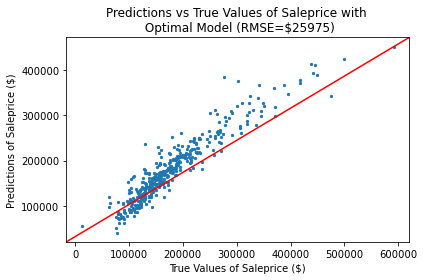

In [177]:
## The line / model

fig, ax = plt.subplots()
ax.scatter(y_holdout, ridge.predict(Z_holdout), s=5)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title("Predictions vs True Values of Saleprice with \n Optimal Model (RMSE=$25975)")
plt.xlabel("True Values of Saleprice ($)")
plt.ylabel("Predictions of Saleprice ($)")

plt.tight_layout()

fig.savefig('p_vs_t_opt.png', dpi=200) 

#### Lasso Regression
---

In [178]:
# instantiating the model
lasso = LassoCV(n_alphas=200)

# fitting the model to the training set
lasso.fit(Z_train, y_train)

LassoCV(n_alphas=200)

In [179]:
lasso.alpha_
print(f'The optimal value of alpha for our lasso regression is {lasso.alpha_}')

The optimal value of alpha for our lasso regression is 142.7149405902736


##### Training Set MSE

In [180]:
# predicting target values for training set
lasso.predict(Z_train)

array([134546.72997996, 181605.96007653, 103840.54110412, ...,
       212819.11767014,  69000.15430051, 223732.33364199])

In [181]:
# training set mean squared error
lasso_mse_train_opt = mean_squared_error(y_train, lasso.predict(Z_train))

##### Holdout Set MSE

In [182]:
# predicting target values for holdout set
lasso.predict(Z_holdout)

array([118555.06402373, 375699.435027  , 110057.33666587, 111597.53648374,
       125810.11445412, 269057.14923292, 215342.0943899 , 192277.43876425,
       239403.028171  , 150942.08527296, 205846.65276887, 311872.4927461 ,
       112915.25757889, 125319.19995011, 261914.51528123,  91300.32159118,
       217463.61417526, 229986.97938453, 128279.65261792, 228242.1874458 ,
       160665.50332914, 110661.29282475, 125846.81701423, 226542.42121183,
       147627.08228223, 164055.81695105, 102558.7826962 , 186528.70133974,
       226607.23366595, 132010.11962344, 119729.24697821, 243257.1993639 ,
       141891.1362726 , 215670.29056534, 137120.71303219, 302111.50993636,
       217550.87695587, 141333.82229909, 128340.77779314, 135884.45259792,
       152184.63495331, 206744.2436973 , 111327.02875403, 143859.58245321,
       252254.93096849, 112934.08275843, 178051.90862062, 187391.34734628,
       109272.06195282, 120164.64460636,  98573.57430556, 140544.63422871,
       161827.90220898,  

In [183]:
# Holdout set mean squared error
lasso_mse_hold_opt = mean_squared_error(y_holdout, lasso.predict(Z_holdout))

##### Cross val Score

In [184]:
# cross val score
lasso_cvs_opt = cross_val_score(Lasso(lasso.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Elastic Net Regression
---

In [185]:
# instatiating the model
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=200)

# fitting the model to the training set
enet.fit(Z_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_alphas=200)

In [186]:
enet.alphas_ 

array([[6.42296821e+05, 6.20383725e+05, 5.99218232e+05, ...,
        6.88472387e+02, 6.64983929e+02, 6.42296821e+02],
       [1.28459364e+05, 1.24076745e+05, 1.19843646e+05, ...,
        1.37694477e+02, 1.32996786e+02, 1.28459364e+02],
       [9.17566888e+04, 8.86262464e+04, 8.56026046e+04, ...,
        9.83531982e+01, 9.49977041e+01, 9.17566888e+01],
       ...,
       [6.76101917e+04, 6.53035500e+04, 6.30756034e+04, ...,
        7.24707776e+01, 6.99983083e+01, 6.76101917e+01],
       [6.48784668e+04, 6.26650227e+04, 6.05270942e+04, ...,
        6.95426654e+01, 6.71700938e+01, 6.48784668e+01],
       [6.42296821e+04, 6.20383725e+04, 5.99218232e+04, ...,
        6.88472387e+01, 6.64983929e+01, 6.42296821e+01]])

In [187]:
enet.l1_ratio_

1.0

The optimal l1 ratio found our elastic net was found to be 1, which means it is just the same as a lasso regularisation. 

In [188]:
enet.alpha_
print(f'The optimal value of alpha for our elastic net regression is {enet.alpha_}')

The optimal value of alpha for our elastic net regression is 142.7149405902736


##### Training Set MSE

In [189]:
# predicting target values for training set
enet.predict(Z_train)

array([134546.72997996, 181605.96007653, 103840.54110412, ...,
       212819.11767014,  69000.15430051, 223732.33364199])

In [190]:
# training set mean squared error
elasticnet_mse_train_opt = mean_squared_error(y_train, enet.predict(Z_train))

Exactly the same as the Training set MSE for our lasso regression.

##### Holdout Set MSE

In [191]:
# predicting target values for holdout set
enet.predict(Z_holdout)

array([118555.06402373, 375699.435027  , 110057.33666587, 111597.53648374,
       125810.11445412, 269057.14923292, 215342.0943899 , 192277.43876425,
       239403.028171  , 150942.08527296, 205846.65276887, 311872.4927461 ,
       112915.25757889, 125319.19995011, 261914.51528123,  91300.32159118,
       217463.61417526, 229986.97938453, 128279.65261792, 228242.1874458 ,
       160665.50332914, 110661.29282475, 125846.81701423, 226542.42121183,
       147627.08228223, 164055.81695105, 102558.7826962 , 186528.70133974,
       226607.23366595, 132010.11962344, 119729.24697821, 243257.1993639 ,
       141891.1362726 , 215670.29056534, 137120.71303219, 302111.50993636,
       217550.87695587, 141333.82229909, 128340.77779314, 135884.45259792,
       152184.63495331, 206744.2436973 , 111327.02875403, 143859.58245321,
       252254.93096849, 112934.08275843, 178051.90862062, 187391.34734628,
       109272.06195282, 120164.64460636,  98573.57430556, 140544.63422871,
       161827.90220898,  

In [192]:
# Holdout set mean squared error
elasticnet_mse_hold_opt = mean_squared_error(y_holdout, enet.predict(Z_holdout))

Exactly the same as the Holdout set MSE for our lasso regression.

##### Cross val Score

In [193]:
# cross val score
elasticnet_cvs_opt = cross_val_score(ElasticNet(enet.alpha_, l1_ratio=1), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Summary<a name="optimalmodelsummary"></a>
---

In [194]:
print('Linear Regression')
print(f"The Optimal Model's linear regression on the training data has a MSE of {lr_mse_train_opt}")
print(f"The Optimal Model's linear regression on the holdout data has a MSE of {lr_mse_hold_opt}")
print(f"The Optimal Model's linear regression has a cross validation score of {lr_cvs_opt}")
print('')
print('Polynomial Regression')
print(f"The Optimal Model's polynomial regression on the training data has a MSE of {poly_mse_train_opt}")
print(f"The Optimal Model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_opt}")
print(f"The Optimal Model's polynomial regression has a cross validation score of {poly_cvs_opt}")
print('')
print('Ridge Regression')
print(f"The Optimal Model's ridge regression on the training data has a MSE of {ridge_mse_train_opt}")
print(f"The Optimal Model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_opt}")
print(f"The Optimal Model's ridge regression has a cross validation score of {ridge_cvs_opt}")
print('')
print('Lasso Regression')
print(f"The Optimal Model's lasso regression on the training data has a MSE of {lasso_mse_train_opt}")
print(f"The Optimal Model's lasso regression on the holdout data has a MSE of {lasso_mse_hold_opt}")
print(f"The Optimal Model's lasso regression has a cross validation score of {lasso_cvs_opt}")
print('')
print('Elastic Net Regression')
print(f"The Optimal Model's elastic net regression on the training data has a MSE of {elasticnet_mse_train_opt}")
print(f"The Optimal Model's elastic net regression on the holdout data has a MSE of {elasticnet_mse_hold_opt}")
print(f"The Optimal Model's elastic net regression has a cross validation score of {elasticnet_cvs_opt}")
print('')

Linear Regression
The Optimal Model's linear regression on the training data has a MSE of 753310507.9008569
The Optimal Model's linear regression on the holdout data has a MSE of 674775954.7793754
The Optimal Model's linear regression has a cross validation score of -923517983.7090797

Polynomial Regression
The Optimal Model's polynomial regression on the training data has a MSE of 331590136.0918467
The Optimal Model's polynomial regression on the holdout data has a MSE of 5121551890.842178
The Optimal Model's polynomial regression has a cross validation score of -108076920708.17574

Ridge Regression
The Optimal Model's ridge regression on the training data has a MSE of 753553680.7493601
The Optimal Model's ridge regression on the holdout data has a MSE of 674685309.529057
The Optimal Model's ridge regression has a cross validation score of -813619992.5832298

Lasso Regression
The Optimal Model's lasso regression on the training data has a MSE of 754671886.5660098
The Optimal Model's l

#### Optimal Model Analysis
- Polynomial regression has the the lowest mean squared error on the training data
- Ridge regression has the lowest mean squared error on the holdout data
- Elastic net regression has the best cross validation score
- Overall, ridge net regression looks to be the best regression for our Optimal Model

## Model Comparison \#1<a name="modelcomp1"></a>

In [195]:
print("Polynomial Regression of LLL's Model")
print(f"LLL Model's polynomial regression on the training data has a MSE of {poly_mse_train_LLL}")
print(f"LLL Model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_LLL}")
print(f"LLL Model's polynomial regression has a cross validation score of {poly_cvs_LLL}")
print('')
print('Polynomial Regression of Improved Model')
print(f"The 'Quality' Model's polynomial regression on the training data has a MSE of {poly_mse_train_qual}")
print(f"The 'Quality' Model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_qual}")
print(f"The 'Quality' Model's polynomial regression has a cross validation score of {poly_cvs_qual}")
print('')
print('Ridge Regression of Optimal Model')
print(f"The Optimal Model's ridge regression on the training data has a MSE of {ridge_mse_train_opt}")
print(f"The Optimal Model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_opt}")
print(f"The Optimal Model's ridge regression has a cross validation score of {ridge_cvs_opt}")
print('')


Polynomial Regression of LLL's Model
LLL Model's polynomial regression on the training data has a MSE of 1307161190.1881752
LLL Model's polynomial regression on the holdout data has a MSE of 1738764633.4930825
LLL Model's polynomial regression has a cross validation score of -1454138891.9345508

Polynomial Regression of Improved Model
The 'Quality' Model's polynomial regression on the training data has a MSE of 1221697081.088318
The 'Quality' Model's polynomial regression on the holdout data has a MSE of 1272436205.4561198
The 'Quality' Model's polynomial regression has a cross validation score of -1246700898.8674881

Ridge Regression of Optimal Model
The Optimal Model's ridge regression on the training data has a MSE of 753553680.7493601
The Optimal Model's ridge regression on the holdout data has a MSE of 674685309.529057
The Optimal Model's ridge regression has a cross validation score of -813619992.5832298



### Model Comparison \#1 Analysis<a name='modelcomp1anal'></a>

- Using the best regression model from each business model, we can clearly see that the Optimal Model produces the lowest mean squared errors, followed by the Improved Model, with the Model of L<sup>3</sup> being the most inaccurate out of the lot with the highest mean squared errors and cross validation score.
- For both the Model of L<sup>3</sup> and the Improved Model, we can see from their training set MSE being lower than their holdout set MSE (much lower, in the case of L<sup>3</sup>'s regression model) that their regression models are overfit to the training data
    - Expected behaviour from a polynomial regression
- However, for the Optimal Model, we can see that the regression model is underfit to the training data. This implies that our current features are insufficient in order to accurately predict the price
<p>
 
From all of this, we can try to improve on the Optimal Model by including more features to create an even more accurate model.

### Improved Optimal Model<a name="ioptimalmodel"></a>
---

We are trying to improve on our optimal model by increasing the number features to include some of our other strong  predictors from our feature selecting [lasso graph](#lasso4)

- `bsmt_half_bath`
- `full_bath`
- `half_bath`
- `lot_frontage`
- `overall_cond`
- `ms_subclass`
- `central_air`
- `heating`
- `utilities`

#### Defining parameters for the Improved Optimal Model's non-regularized models

For linear and polynomial regression we need one column value of our dummies as reference to prevent multicollinearity:

In [196]:
# Defining parameters for Improved Optimal Model
X = df[[
    'overall_qual', 
    'age',
    'lot_frontage',
    'bedroom_abvgr', 
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'total_bsmt_sf', 
    'lot_area', 
    'gr_liv_area',
    'garage_area',
    'yrs_since_remod/add',
    'overall_cond',
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'
]]

# Make into dummies
X = pd.get_dummies(X, columns=[
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'], drop_first=True)

y = df['saleprice']

In [197]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [198]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Linear Regression
---

In [199]:
# instatiating the model
lr = LinearRegression()

# fitting the model to the training set
lr.fit(Z_train, y_train)

LinearRegression()

##### Training Set MSE

In [200]:
# predicting target values for training set
lr.predict(Z_train)

array([141747.23439665, 185143.48439665,  94954.48439665, ...,
       213815.5917138 ,  73873.04642147, 224061.73439665])

In [201]:
# training set mean squared error
lr_mse_train_iopt = mean_squared_error(y_train, lr.predict(Z_train))

##### Holdout Set MSE

In [202]:
# predicting target values for holdout set
lr.predict(Z_holdout)

array([119917.04724545, 362111.98439665, 115246.8417138 , 122192.23439665,
       128936.23439665, 280653.75394022, 210738.23439665, 192214.73439665,
       238025.23439665, 149402.48439665, 203495.73439665, 311931.98439665,
       107363.73439665, 120321.48439665, 253952.23439665,  88436.06596503,
       218425.23439665, 228690.23439665, 126837.75394022, 225500.23439665,
       171818.8417138 , 103203.48439665, 121955.98439665, 223791.73439665,
       153990.23439665, 159374.5917138 , 102220.06596503, 183403.48439665,
       231573.75394022, 130150.23439665, 119600.73439665, 241761.89061383,
       136421.75394022, 214872.73439665, 154872.23439665, 297226.23439665,
       219821.98439665, 153682.23439665, 127657.73439665, 137858.73439665,
       151877.75394022, 206374.98439665, 121300.23439665, 144346.48439665,
       255183.23439665, 108066.48439665, 176707.23439665, 186111.23439665,
       101752.98439665, 134368.48439665,  90812.3417138 , 142093.48439665,
       156498.48439665,  

In [203]:
# Holdout set mean squared error
lr_mse_hold_iopt = mean_squared_error(y_holdout, lr.predict(Z_holdout))

##### Cross Val Score

In [204]:
# cross val score
lr_cvs_iopt = cross_val_score(lr, 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Polynomial Regression
---

In [205]:
# outling poly parameters
poly = PolynomialFeatures(degree=2, include_bias=True)

# fitting the model to the training set
X_train_poly = poly.fit_transform(X_train)
X_holdout_poly = poly.transform(X_holdout)

# instatiating the model
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

##### Training Set MSE

In [206]:
# predicting target values for training set
lr.predict(X_train_poly)

array([148156.10501003, 207172.84810448, 135212.70738792, ...,
       150108.44308376,  82670.30773926, 216588.04878521])

In [207]:
# training set mean squared error
poly_mse_train_iopt = mean_squared_error(y_train, lr.predict(X_train_poly))

##### Holdout Set MSE

In [208]:
# predicting target values for holdout set
lr.predict(X_holdout_poly)

array([   226707.36039734,    401018.11969471,    112571.7561264 ,
          168096.62944794,    102375.48789024,    299253.10626507,
          181382.41410255,    231414.24167824,    240675.59926987,
          168411.08725071,    182543.81600189,    293860.0822382 ,
           99010.8901453 ,    116219.167593  ,    231495.75738525,
           63070.49475002,    204674.67307472,    197903.56237411,
           67445.70487022,    210472.72332001,   -598240.73922729,
          129118.45439911,    113950.05379868,    219195.41259956,
           94953.40232182,    159735.55906677,    102872.77507114,
          197608.5600481 ,    130896.42842007,    141422.90398502,
          131116.67550659,    221164.92946911,    126406.81073761,
          199610.24510288,    149048.32474136,    261969.3568325 ,
          203795.09704781,    408620.56172657,    289143.95869255,
          132976.9016819 ,    178792.65371513,    206908.72236156,
          112545.7091856 ,    134493.17182827,    244675.00838

In [209]:
# Holdout set mean squared error
poly_mse_hold_iopt = mean_squared_error(y_holdout, lr.predict(X_holdout_poly))

##### Cross Val Score

In [210]:
poly_cvs_iopt = cross_val_score(lr, 
                X_train_poly, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Defining parameters for Improved Optimal Model's regularized models
---

In [211]:
# Defining parameters for Improved Optimal Model
X = df[[
    'overall_qual', 
    'age',
    'lot_frontage',
    'bedroom_abvgr', 
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'total_bsmt_sf', 
    'lot_area', 
    'gr_liv_area',
    'garage_area',
    'yrs_since_remod/add',
    'overall_cond',
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'
]]

# Make into dummies
X = pd.get_dummies(X, columns=[
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'],)

y = df['saleprice']

In [212]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
                                                          X,
                                                          y,
                                                          test_size=0.2,
                                                          random_state=42
)

In [213]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_holdout = sc.transform(X_holdout)

#### Ridge Regression
---

In [214]:
# instatiating the model
ridge = RidgeCV(alphas=np.logspace(.1, 10, 200))

# fitting the model to the training set
ridge.fit(Z_train, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.41172057e+00, 1.58306041e+00, 1.77519568e+00,
       1.99065031e+00, 2.23225456e+00, 2.50318220e+00, 2.80699220e+00,
       3.14767547e+00, 3.52970730e+00, 3.95810615e+00, 4.43849956e+00,
       4.97719808e+00, 5.58127817e+00, 6.25867517e+00, 7.01828751e+00,
       7.87009364e+00, 8.82528305e+00, 9.89640333e+00, 1.10975250e+01,
       1.24444261e+01, 1.39548000e+0...
       7.17428945e+08, 8.04502945e+08, 9.02145074e+08, 1.01163798e+09,
       1.13441999e+09, 1.27210398e+09, 1.42649862e+09, 1.59963206e+09,
       1.79377862e+09, 2.01148866e+09, 2.25562205e+09, 2.52938580e+09,
       2.83637611e+09, 3.18062569e+09, 3.56665668e+09, 3.99954005e+09,
       4.48496227e+09, 5.02929995e+09, 5.63970362e+09, 6.32419169e+09,
       7.09175574e+09, 7.95247866e+09, 8.91766711e+09, 1.00000000e+10]))

In [215]:
ridge.alpha_
print(f'The optimal value of alpha for our ridge regression is {ridge.alpha_}')

The optimal value of alpha for our ridge regression is 13.954800048959353


##### Training Set MSE

In [216]:
# predicting target values for training set
ridge.predict(Z_train)

array([141835.25569418, 184932.13589318,  95502.37657818, ...,
       212535.16731413,  74246.03166496, 223831.50483348])

In [217]:
# training set mean squared error
ridge_mse_train_iopt = mean_squared_error(y_train, ridge.predict(Z_train))

##### Holdout Set MSE

In [218]:
# predicting target values for holdout set
ridge.predict(Z_holdout)

array([119685.23201692, 363708.72250791, 114997.96788269, 123068.82414752,
       129312.21068489, 280923.80121896, 211128.94999295, 191095.93795964,
       237455.80996417, 150098.19626608, 203537.04806112, 311497.39653655,
       107289.07425798, 120627.62185097, 251876.9159022 ,  87633.9203866 ,
       218412.69982863, 228406.05243319, 126622.6090291 , 225448.45491839,
       171068.13882682, 103658.02649895, 121756.90320585, 223820.29468633,
       153599.69801807, 160176.27417606, 102896.40291862, 183672.62005016,
       229771.99863255, 130122.16509852, 119869.81764082, 242326.08142231,
       137256.58377381, 214531.59188057, 153026.33260706, 297571.09823528,
       219508.39716398, 152454.04432888, 128961.00347889, 137696.98831386,
       152822.01443922, 206447.28922685, 120048.60984611, 143132.11356511,
       254635.75655742, 108725.23065784, 177206.83602617, 186250.20345533,
       102705.33761663, 134525.80179293,  91195.43414775, 141993.43499411,
       157424.79386664,  

In [219]:
# Holdout set mean squared error
ridge_mse_hold_iopt = mean_squared_error(y_holdout, ridge.predict(Z_holdout))

##### Cross val Score

In [220]:
# cross val score 
ridge_cvs_iopt = cross_val_score(Ridge(ridge.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

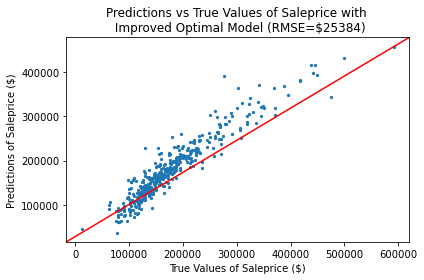

In [221]:
## The line / model
fig, ax = plt.subplots()
ax.scatter(y_holdout, ridge.predict(Z_holdout), s=5)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title("Predictions vs True Values of Saleprice with \n Improved Optimal Model (RMSE=$25384)")
plt.xlabel("True Values of Saleprice ($)")
plt.ylabel("Predictions of Saleprice ($)")

plt.tight_layout()

fig.savefig('p_vs_t_iopt.png', dpi=200) 

In [222]:
# residuals of best iopt regression for jointplot
iopt_residuals = y_holdout - ridge.predict(Z_holdout)

#### Lasso Regression
---

In [223]:
    # instatiating the model
lasso = LassoCV(n_alphas=200)

# fitting the model to the training set
lasso.fit(Z_train, y_train)

LassoCV(n_alphas=200)

In [224]:
lasso.alpha_
print(f'The optimal value of alpha for our lasso regression is {lasso.alpha_}')

The optimal value of alpha for our lasso regression is 100.85923556492563


##### Training Set MSE

In [225]:
# predicting target values for training set
lasso.predict(Z_train)

array([141621.38747394, 184225.56667054,  95643.84166356, ...,
       211479.22990478,  72293.41477326, 223885.22904877])

In [226]:
# training set mean squared error
lasso_mse_train_iopt = mean_squared_error(y_train, lasso.predict(Z_train))

##### Holdout Set MSE

In [227]:
# predicting target values for holdout set
lasso.predict(Z_holdout)

array([120375.56591613, 362041.12778817, 113968.44136871, 121710.16789264,
       127735.77969001, 277927.86668086, 211931.93569723, 191103.67568024,
       237931.8776117 , 150624.53683248, 203240.46495194, 311327.13666704,
       108359.96526161, 121343.94070614, 254401.90149503,  87801.00349518,
       219504.83081637, 227382.13130558, 126095.13405946, 226190.41555748,
       168938.52074501, 105071.21555116, 122933.32650402, 224310.44160468,
       151698.63013083, 162284.35192342, 102748.85607339, 184422.05900777,
       230122.23972423, 130155.14802036, 120415.1430652 , 242253.29890946,
       138054.64313896, 215111.13527737, 152152.48727699, 296991.1571286 ,
       218268.75847645, 152988.85184564, 126759.95616565, 138107.4203116 ,
       152700.87202932, 206461.85640742, 120015.50827802, 144072.14549085,
       253490.05838409, 107610.04093757, 177517.01120405, 186465.24659702,
       102727.41239833, 133289.33070951,  88275.42696331, 140983.07475755,
       156917.86977852,  

In [228]:
# Holdout set mean squared error
lasso_mse_hold_iopt = mean_squared_error(y_holdout, lasso.predict(Z_holdout))

##### Cross val Score

In [229]:
# cross val score
lasso_cvs_iopt = cross_val_score(Lasso(lasso.alpha_), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Elastic Net Regression
---

In [230]:
# instatiating the model
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=200)

# fitting the model to the training set
enet.fit(Z_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_alphas=200)

In [231]:
enet.alphas_ 

array([[6.42296821e+05, 6.20383725e+05, 5.99218232e+05, ...,
        6.88472387e+02, 6.64983929e+02, 6.42296821e+02],
       [1.28459364e+05, 1.24076745e+05, 1.19843646e+05, ...,
        1.37694477e+02, 1.32996786e+02, 1.28459364e+02],
       [9.17566888e+04, 8.86262464e+04, 8.56026046e+04, ...,
        9.83531982e+01, 9.49977041e+01, 9.17566888e+01],
       ...,
       [6.76101917e+04, 6.53035500e+04, 6.30756034e+04, ...,
        7.24707776e+01, 6.99983083e+01, 6.76101917e+01],
       [6.48784668e+04, 6.26650227e+04, 6.05270942e+04, ...,
        6.95426654e+01, 6.71700938e+01, 6.48784668e+01],
       [6.42296821e+04, 6.20383725e+04, 5.99218232e+04, ...,
        6.88472387e+01, 6.64983929e+01, 6.42296821e+01]])

In [232]:
enet.l1_ratio_

1.0

The optimal l1 ratio found our elastic net was found to be 1, which means it is just the same as a lasso regularisation. 

In [233]:
enet.alpha_
print(f'The optimal value of alpha for our elastic net regression is {enet.alpha_}')

The optimal value of alpha for our elastic net regression is 100.85923556492563


##### Training Set MSE

In [234]:
# predicting target values for training set
enet.predict(Z_train)

array([141621.38747394, 184225.56667054,  95643.84166356, ...,
       211479.22990478,  72293.41477326, 223885.22904877])

In [235]:
# training set mean squared error
elasticnet_mse_train_iopt = mean_squared_error(y_train, enet.predict(Z_train))

Exactly the same as the Training set MSE for our lasso regression.

##### Holdout Set MSE

In [236]:
# predicting target values for holdout set
enet.predict(Z_holdout)

array([120375.56591613, 362041.12778817, 113968.44136871, 121710.16789264,
       127735.77969001, 277927.86668086, 211931.93569723, 191103.67568024,
       237931.8776117 , 150624.53683248, 203240.46495194, 311327.13666704,
       108359.96526161, 121343.94070614, 254401.90149503,  87801.00349518,
       219504.83081637, 227382.13130558, 126095.13405946, 226190.41555748,
       168938.52074501, 105071.21555116, 122933.32650402, 224310.44160468,
       151698.63013083, 162284.35192342, 102748.85607339, 184422.05900777,
       230122.23972423, 130155.14802036, 120415.1430652 , 242253.29890946,
       138054.64313896, 215111.13527737, 152152.48727699, 296991.1571286 ,
       218268.75847645, 152988.85184564, 126759.95616565, 138107.4203116 ,
       152700.87202932, 206461.85640742, 120015.50827802, 144072.14549085,
       253490.05838409, 107610.04093757, 177517.01120405, 186465.24659702,
       102727.41239833, 133289.33070951,  88275.42696331, 140983.07475755,
       156917.86977852,  

In [237]:
# Holdout set mean squared error
elasticnet_mse_hold_iopt = mean_squared_error(y_holdout, enet.predict(Z_holdout))

Exactly the same as the Holdout set MSE for our lasso regression.

##### Cross val Score

In [238]:
# cross val score
elasticnet_cvs_iopt = cross_val_score(ElasticNet(enet.alpha_, l1_ratio=1), 
                Z_train, 
                y_train, 
                cv=10,
                scoring='neg_mean_squared_error'
).mean()

#### Summary<a name="ioptimalmodelsummary"></a>
---

In [239]:
print('Linear Regression')
print(f"The Improved Optimal Model's linear regression on the training data has a MSE of {lr_mse_train_iopt}")
print(f"The Improved Optimal Model's linear regression on the holdout data has a MSE of {lr_mse_hold_iopt}")
print(f"The Improved Optimal Model model's linear regression has a cross validation score of {lr_cvs_iopt}")
print('')
print('Polynomial Regression')
print(f"The Improved Optimal Model's polynomial regression on the training data has a MSE of {poly_mse_train_iopt}")
print(f"The Improved Optimal Model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_iopt}")
print(f"The Improved Optimal Model's polynomial regression has a cross validation score of {poly_cvs_iopt}")
print('')
print('Ridge Regression')
print(f"The Improved Optimal Model's ridge regression on the training data has a MSE of {ridge_mse_train_iopt}")
print(f"The Improved Optimal Model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_iopt}")
print(f"The Improved Optimal Model's ridge regression has a cross validation score of {ridge_cvs_iopt}")
print('')
print('Lasso Regression')
print(f"The Improved Optimal Model's lasso regression on the training data has a MSE of {lasso_mse_train_iopt}")
print(f"The Improved Optimal Model's lasso regression on the holdout data has a MSE of {lasso_mse_hold_iopt}")
print(f"The Improved Optimal Model's lasso regression has a cross validation score of {lasso_cvs_iopt}")
print('')
print('Elastic Net Regression')
print(f"The Improved Optimal Model's elastic net regression on the training data has a MSE of {elasticnet_mse_train_iopt}")
print(f"The Improved Optimal Model's elastic net regression on the holdout data has a MSE of {elasticnet_mse_hold_iopt}")
print(f"The Improved Optimal Model's elastic net regression has a cross validation score of {elasticnet_cvs_iopt}")
print('')

Linear Regression
The Improved Optimal Model's linear regression on the training data has a MSE of 701144256.1646152
The Improved Optimal Model's linear regression on the holdout data has a MSE of 646416278.2457118
The Improved Optimal Model model's linear regression has a cross validation score of -8.210916019859226e+33

Polynomial Regression
The Improved Optimal Model's polynomial regression on the training data has a MSE of 200598652.4857455
The Improved Optimal Model's polynomial regression on the holdout data has a MSE of 453563008413.3339
The Improved Optimal Model's polynomial regression has a cross validation score of -2402321481170.67

Ridge Regression
The Improved Optimal Model's ridge regression on the training data has a MSE of 702011241.8395839
The Improved Optimal Model's ridge regression on the holdout data has a MSE of 644332615.98345
The Improved Optimal Model's ridge regression has a cross validation score of -781401018.28174

Lasso Regression
The Improved Optimal Mod

#### Improved Optimal Model Analysis
- Polynomial regression has the the lowest mean squared error on the training data
- Ridge regression has the lowest mean squared error on the holdout data
- Ridge regression has the best cross validation score
- Overall, ridge regression looks to be the best regression for our Improved Optimal Model

## Model Comparison \#2<a name="modelcomp2"></a>

In [240]:
print("Polynomial Regression of LLL's Model")
print(f"LLL Model's polynomial regression on the training data has a MSE of {poly_mse_train_LLL}")
print(f"LLL Model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_LLL}")
print(f"LLL Model's polynomial regression has a cross validation score of {poly_cvs_LLL}")
print('')
print("Polynomial Regression of 'Quality' Model")
print(f"The 'Quality' Model's polynomial regression on the training data has a MSE of {poly_mse_train_qual}")
print(f"The 'Quality' Model's polynomial regression on the holdout data has a MSE of {poly_mse_hold_qual}")
print(f"The 'Quality' Model's polynomial regression has a cross validation score of {poly_cvs_qual}")
print('')
print('Ridge Regression of Optimal Model')
print(f"The Optimal Model's ridge regression on the training data has a MSE of {ridge_mse_train_opt}")
print(f"The Optimal Model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_opt}")
print(f"The Optimal Model's ridge regression has a cross validation score of {ridge_cvs_opt}")
print('')
print('Ridge Regression of Improved Optimal Model')
print(f"The Improved Optimal Model's ridge regression on the training data has a MSE of {ridge_mse_train_iopt}")
print(f"The Improved Optimal Model's ridge regression on the holdout data has a MSE of {ridge_mse_hold_iopt}")
print(f"The Improved Optimal Model's ridge regression has a cross validation score of {ridge_cvs_iopt}")
print('')

Polynomial Regression of LLL's Model
LLL Model's polynomial regression on the training data has a MSE of 1307161190.1881752
LLL Model's polynomial regression on the holdout data has a MSE of 1738764633.4930825
LLL Model's polynomial regression has a cross validation score of -1454138891.9345508

Polynomial Regression of 'Quality' Model
The 'Quality' Model's polynomial regression on the training data has a MSE of 1221697081.088318
The 'Quality' Model's polynomial regression on the holdout data has a MSE of 1272436205.4561198
The 'Quality' Model's polynomial regression has a cross validation score of -1246700898.8674881

Ridge Regression of Optimal Model
The Optimal Model's ridge regression on the training data has a MSE of 753553680.7493601
The Optimal Model's ridge regression on the holdout data has a MSE of 674685309.529057
The Optimal Model's ridge regression has a cross validation score of -813619992.5832298

Ridge Regression of Improved Optimal Model
The Improved Optimal Model's ri

### Model Comparison \#2 Analysis<a name='modelcomp2anal'></a>

- With the inclusion of some additional features that we had originally cut due to our [feature selecting lasso regression](#Lasso4), we can see that the accuracy of our model increases
- However, despite this our model still appears to be underfit, which implies that a more accurate model could be found by increasing the number of features used
- The previous point also implies that in our feature selection step, we may have overlooked a number features that could have been strong predictors of `saleprice` as we are already using all of our strongest home value predictors  in our Improved Optimal Model

## Kaggle<a name="kaggle"></a>

For the Kaggle competition, we will be using our model with the lowest MSE on the holdout data, which would be the Improved Optimal Model's ridge regression.

### Data reading and cleaning

In [241]:
test = pd.read_csv("./datasets/test.csv")

In [242]:
ids = test['Id']

In [243]:
# changing from year to years since
test['Year Remod/Add'] = test['Yr Sold'] - test['Year Remod/Add']

In [244]:
# changing from year to age
test['Year Built'] = test['Yr Sold'] - test['Year Built'] 

In [245]:
test.rename(columns={'Year Remod/Add': 'yrs since remod/add',
                   'Year Built': 'age'}, inplace=True)

Cutting down to just the columns we need

In [246]:
test[['MS Zoning',
    'Neighborhood', 
    'Condition 1',
    'Condition 2', 
    'Overall Qual', 
    'age',
    'House Style', 
    'MS SubClass', 
    'Lot Frontage', 
    'Lot Config', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath',
    'Full Bath',
    'Half Bath',
    'Low Qual Fin SF',
    'Total Bsmt SF',
    'Lot Area',
    'Gr Liv Area',
    'Central Air',
    'Heating',
    'Utilities',
    'Garage Area',
    'yrs since remod/add',
    'Overall Cond',
    'Bldg Type',
    'Pool Area',
     ]]

,MS Zoning,Neighborhood,Condition 1,Condition 2,Overall Qual,age,House Style,MS SubClass,Lot Frontage,Lot Config,...,Lot Area,Gr Liv Area,Central Air,Heating,Utilities,Garage Area,yrs since remod/add,Overall Cond,Bldg Type,Pool Area
0,RM,OldTown,Norm,Norm,6,96,2Story,190,69.0,Inside,...,9142,1928,N,GasA,AllPub,440,56,8,2fmCon,0
1,RL,Sawyer,Norm,Norm,5,29,1Story,90,NaN,Inside,...,9662,1967,Y,GasA,AllPub,580,29,4,Duplex,0
2,RL,Gilbert,Norm,Norm,7,0,2Story,60,58.0,Inside,...,17104,1496,Y,GasA,AllPub,426,0,5,1Fam,0
3,RM,OldTown,Norm,Norm,5,84,1Story,30,60.0,Inside,...,8520,968,Y,GasA,AllPub,480,1,6,1Fam,0
4,RL,NAmes,Norm,Norm,6,46,1Story,20,NaN,Inside,...,9500,1394,Y,GasA,AllPub,514,46,5,1Fam,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,RL,NWAmes,PosN,Norm,6,33,2Story,60,80.0,Inside,...,8000,1877,Y,GasA,AllPub,488,33,6,1Fam,0
874,RL,NAmes,Norm,Norm,6,42,2Story,60,90.0,Inside,...,14670,1988,Y,GasA,AllPub,480,9,7,1Fam,0
875,RL,Sawyer,Feedr,Norm,5,40,1Story,20,55.0,Inside,...,8250,1211,Y,GasA,AllPub,322,40,5,1Fam,0
876,RL,NAmes,Norm,Norm,4,36,1Story,20,60.0,FR2,...,9000,864,Y,GasA,AllPub,528,36,6,1Fam,0


In [247]:
test = test[['MS Zoning',
    'Neighborhood', 
    'Condition 1',
    'Condition 2', 
    'Overall Qual', 
    'age',
    'House Style', 
    'MS SubClass', 
    'Lot Frontage', 
    'Lot Config', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath',
    'Full Bath',
    'Half Bath',
    'Low Qual Fin SF',
    'Total Bsmt SF',
    'Lot Area',
    'Gr Liv Area',
    'Central Air',
    'Heating',
    'Utilities',
    'Garage Area',
    'yrs since remod/add',
    'Overall Cond',
    'Bldg Type',
    'Pool Area',
     ]]

In [248]:
test

,MS Zoning,Neighborhood,Condition 1,Condition 2,Overall Qual,age,House Style,MS SubClass,Lot Frontage,Lot Config,...,Lot Area,Gr Liv Area,Central Air,Heating,Utilities,Garage Area,yrs since remod/add,Overall Cond,Bldg Type,Pool Area
0,RM,OldTown,Norm,Norm,6,96,2Story,190,69.0,Inside,...,9142,1928,N,GasA,AllPub,440,56,8,2fmCon,0
1,RL,Sawyer,Norm,Norm,5,29,1Story,90,NaN,Inside,...,9662,1967,Y,GasA,AllPub,580,29,4,Duplex,0
2,RL,Gilbert,Norm,Norm,7,0,2Story,60,58.0,Inside,...,17104,1496,Y,GasA,AllPub,426,0,5,1Fam,0
3,RM,OldTown,Norm,Norm,5,84,1Story,30,60.0,Inside,...,8520,968,Y,GasA,AllPub,480,1,6,1Fam,0
4,RL,NAmes,Norm,Norm,6,46,1Story,20,NaN,Inside,...,9500,1394,Y,GasA,AllPub,514,46,5,1Fam,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,RL,NWAmes,PosN,Norm,6,33,2Story,60,80.0,Inside,...,8000,1877,Y,GasA,AllPub,488,33,6,1Fam,0
874,RL,NAmes,Norm,Norm,6,42,2Story,60,90.0,Inside,...,14670,1988,Y,GasA,AllPub,480,9,7,1Fam,0
875,RL,Sawyer,Feedr,Norm,5,40,1Story,20,55.0,Inside,...,8250,1211,Y,GasA,AllPub,322,40,5,1Fam,0
876,RL,NAmes,Norm,Norm,4,36,1Story,20,60.0,FR2,...,9000,864,Y,GasA,AllPub,528,36,6,1Fam,0


Checking for null values and outliers

In [249]:
test.isnull().sum()

MS Zoning                0
Neighborhood             0
Condition 1              0
Condition 2              0
Overall Qual             0
age                      0
House Style              0
MS SubClass              0
Lot Frontage           160
Lot Config               0
Bedroom AbvGr            0
Bsmt Full Bath           0
Bsmt Half Bath           0
Full Bath                0
Half Bath                0
Low Qual Fin SF          0
Total Bsmt SF            0
Lot Area                 0
Gr Liv Area              0
Central Air              0
Heating                  0
Utilities                0
Garage Area              0
yrs since remod/add      0
Overall Cond             0
Bldg Type                0
Pool Area                0
dtype: int64

Like before, null values for `Lot Frontage` would = 0

In [250]:
test = test.fillna(0)

In [251]:
test.isnull().sum()

MS Zoning              0
Neighborhood           0
Condition 1            0
Condition 2            0
Overall Qual           0
age                    0
House Style            0
MS SubClass            0
Lot Frontage           0
Lot Config             0
Bedroom AbvGr          0
Bsmt Full Bath         0
Bsmt Half Bath         0
Full Bath              0
Half Bath              0
Low Qual Fin SF        0
Total Bsmt SF          0
Lot Area               0
Gr Liv Area            0
Central Air            0
Heating                0
Utilities              0
Garage Area            0
yrs since remod/add    0
Overall Cond           0
Bldg Type              0
Pool Area              0
dtype: int64

Change column names to lower case and underscore

In [252]:

test.columns = np.array([column.lower() for column in test.columns])

def underscore(word):
    word = word.replace(' ', '_')
    return word
    
test.columns.map(underscore)
test.columns = test.columns.map(underscore)

In [253]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ms_zoning            878 non-null    object 
 1   neighborhood         878 non-null    object 
 2   condition_1          878 non-null    object 
 3   condition_2          878 non-null    object 
 4   overall_qual         878 non-null    int64  
 5   age                  878 non-null    int64  
 6   house_style          878 non-null    object 
 7   ms_subclass          878 non-null    int64  
 8   lot_frontage         878 non-null    float64
 9   lot_config           878 non-null    object 
 10  bedroom_abvgr        878 non-null    int64  
 11  bsmt_full_bath       878 non-null    int64  
 12  bsmt_half_bath       878 non-null    int64  
 13  full_bath            878 non-null    int64  
 14  half_bath            878 non-null    int64  
 15  low_qual_fin_sf      878 non-null    int

Identifying and dropping outliers of `gr_liv_area` $\geqslant$ 4000 as per the [readme](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [254]:
test.loc[test['gr_liv_area'] >= 4000]

,ms_zoning,neighborhood,condition_1,condition_2,overall_qual,age,house_style,ms_subclass,lot_frontage,lot_config,...,lot_area,gr_liv_area,central_air,heating,utilities,garage_area,yrs_since_remod/add,overall_cond,bldg_type,pool_area
170,RL,NoRidge,Norm,Norm,10,11,2Story,60,160.0,Corner,...,15623,4476,Y,GasA,AllPub,813,11,5,1Fam,555
463,RL,NoRidge,Norm,Norm,10,13,2Story,60,104.0,Corner,...,21535,4316,Y,GasA,AllPub,832,12,6,1Fam,0


But we can't drop them because the Kaggle submission needs to have 878 rows.

In [255]:
#test.drop(index=[170, 463], inplace=True)

Test dataset is clean and ready to be used

### Kaggle regression

In [256]:
# Defining parameters for Kaggle regression training set
X = df[[
    'overall_qual', 
    'age',
    'lot_frontage',
    'bedroom_abvgr', 
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'total_bsmt_sf', 
    'lot_area', 
    'gr_liv_area',
    'garage_area',
    'yrs_since_remod/add',
    'overall_cond',
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'
]]

# Make into dummies
X = pd.get_dummies(X, columns=[
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'],)

y = df['saleprice']

In [257]:
# Kaggle variables
# Defining parameters for Kaggle regression testing set
X1 = test[[
    'overall_qual', 
    'age',
    'lot_frontage',
    'bedroom_abvgr', 
    'bsmt_full_bath',
    'bsmt_half_bath',
    'full_bath',
    'half_bath',
    'total_bsmt_sf', 
    'lot_area', 
    'gr_liv_area',
    'garage_area',
    'yrs_since_remod/add',
    'overall_cond',
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'
]]

# Make into dummies
X1 = pd.get_dummies(X1, columns=[
    'neighborhood',
    'bldg_type',
    'ms_subclass',
    'central_air',
    'heating',
    'utilities'],)

In [258]:
missing_features1 = []
for col in X.columns:
    if col not in X1.columns:
        missing_features1.append(col)

missing_features2 = []
for col in X1.columns:
    if col not in X.columns:
        missing_features2.append(col)

In [259]:
missing_features1

['neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'ms_subclass_150',
 'heating_OthW',
 'heating_Wall',
 'utilities_NoSeWa']

In [260]:
missing_features2

['heating_Floor']

In [261]:
for col in missing_features1:
    X1[col] = 0
    
for col in missing_features2:
    X[col] = 0

In [262]:
X1 = X1[['overall_qual', 'age', 'lot_frontage', 'bedroom_abvgr',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'total_bsmt_sf', 'lot_area', 'gr_liv_area', 'garage_area',
       'yrs_since_remod/add', 'overall_cond', 'neighborhood_Blmngtn',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens','neighborhood_GrnHill',
       'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker', 'bldg_type_1Fam', 'bldg_type_2fmCon',
       'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE',
       'ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45',
       'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75',
       'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150',
       'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190',
       'central_air_N', 'central_air_Y', 'heating_Floor', 'heating_GasA',
       'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall', 'utilities_AllPub', 'utilities_NoSeWa',
       'utilities_NoSewr',]]

X = X[['overall_qual', 'age', 'lot_frontage', 'bedroom_abvgr',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'total_bsmt_sf', 'lot_area', 'gr_liv_area', 'garage_area',
       'yrs_since_remod/add', 'overall_cond', 'neighborhood_Blmngtn',
       'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens','neighborhood_GrnHill',
       'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker', 'bldg_type_1Fam', 'bldg_type_2fmCon',
       'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE',
       'ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45',
       'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75',
       'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150',
       'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190',
       'central_air_N', 'central_air_Y', 'heating_Floor', 'heating_GasA',
       'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall', 'utilities_AllPub', 'utilities_NoSeWa',
       'utilities_NoSewr',]]

In [263]:
# scaling X_train and X_holdout
sc = StandardScaler()
Z = sc.fit_transform(X)
Z1 = sc.transform(X1)

#### Ridge Regression
---

In [264]:
# instantiating the model
ridge = RidgeCV(alphas=np.logspace(.1e-10, 10, 200))

# fitting the model to the entire X
ridge.fit(Z, y)

RidgeCV(alphas=array([1.00000000e+00, 1.12266777e+00, 1.26038293e+00, 1.41499130e+00,
       1.58856513e+00, 1.78343088e+00, 2.00220037e+00, 2.24780583e+00,
       2.52353917e+00, 2.83309610e+00, 3.18062569e+00, 3.57078596e+00,
       4.00880633e+00, 4.50055768e+00, 5.05263107e+00, 5.67242607e+00,
       6.36824994e+00, 7.14942899e+00, 8.02643352e+00, 9.01101825e+00,
       1.01163798e+01, 1.13573336e+0...
       6.98587975e+08, 7.84282206e+08, 8.80488358e+08, 9.88495905e+08,
       1.10975250e+09, 1.24588336e+09, 1.39871310e+09, 1.57029012e+09,
       1.76291412e+09, 1.97916687e+09, 2.22194686e+09, 2.49450814e+09,
       2.80050389e+09, 3.14403547e+09, 3.52970730e+09, 3.96268864e+09,
       4.44878283e+09, 4.99450512e+09, 5.60716994e+09, 6.29498899e+09,
       7.06718127e+09, 7.93409667e+09, 8.90735464e+09, 1.00000000e+10]))

In [265]:
ridge.alpha_
print(f'The optimal value of alpha for our ridge regression is {ridge.alpha_}')

The optimal value of alpha for our ridge regression is 18.041864094283966


##### Testing Set MSE

In [266]:
# predicting target values for testing set
ridge.predict(Z1)

array([163693.09842128, 162316.41662895, 203282.15770017, 114032.08252095,
       177110.36736687,  85111.41129751, 110075.81122892, 150804.95935729,
       192216.09992972, 170883.44951073, 132891.99733467, 135728.85292967,
       163742.60133241, 273453.46141725, 176708.74564162, 110228.12363814,
       140872.96279689, 133822.48500398, 208444.00849662, 181745.98414491,
       146905.22832744, 121650.48790428, 185678.28295383, 166046.51149087,
       192667.20108944, 109012.78902047, 102978.42336159, 107237.16082099,
       156443.11967954,  55622.54177942, 106003.07164325, 100191.37415786,
       224552.70332519, 145423.10431627, 210440.08581484, 178222.64321377,
       117683.59356029,  78148.94740438,  90523.54919328, 212046.03211891,
       146137.00821988, 202067.29954533, 161333.00151799, 166609.08066233,
       203302.56711072,  87028.25869191, 226429.31549575, 108741.66296279,
       132653.42057186, 128243.37533199, 101804.59487567, 205028.59382836,
       244235.65672352, 1

In [267]:
submission = pd.DataFrame(data=ridge.predict(Z1))

In [268]:
submission = pd.concat([ids, submission],axis=1)

In [269]:
submission.to_csv("./submission.csv", 
                  header=['Id', 'SalePrice',], 
                  index=False)

In [270]:
submission

,Id,0
0,2658,163693.098421
1,2718,162316.416629
2,2414,203282.157700
3,1989,114032.082521
4,625,177110.367367
...,...,...
873,1662,190700.353182
874,1234,206470.410822
875,1373,122741.623328
876,1672,98918.446444


## Visualisation Analysis<a name="vizanal"></a>
---

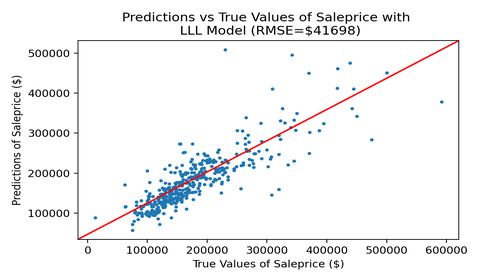

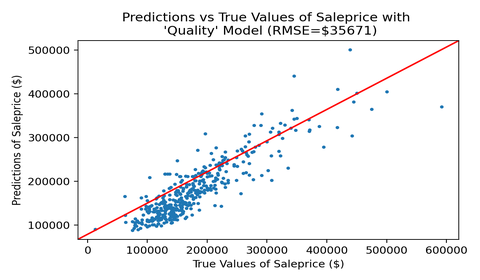

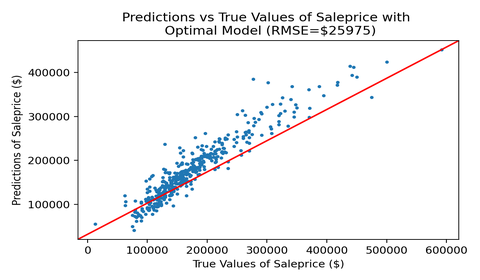

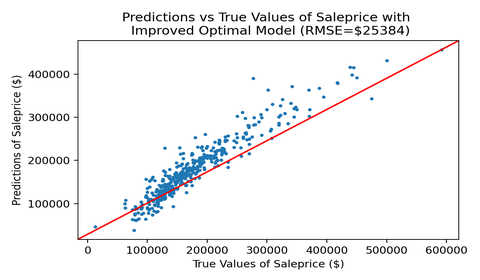

In [271]:
p_vs_t_lll = Image.open("p_vs_t_lll.png")
p_vs_t_lll = p_vs_t_lll.resize((480, 280),Image.ANTIALIAS)

display(p_vs_t_lll)

p_vs_t_qual = Image.open("p_vs_t_qual.png")
p_vs_t_qual = p_vs_t_qual.resize((480, 280),Image.ANTIALIAS)

display(p_vs_t_qual)

p_vs_t_opt = Image.open("p_vs_t_opt.png")
p_vs_t_opt = p_vs_t_opt.resize((480, 280),Image.ANTIALIAS)

display(p_vs_t_opt)

p_vs_t_iopt = Image.open("p_vs_t_iopt.png")
p_vs_t_iopt = p_vs_t_iopt.resize((480, 280),Image.ANTIALIAS)

display(p_vs_t_iopt)



From the above charts we can see the predictive power of our models slowly increase from worst to best, as the scatter points gather closer and closer to the red line of y = x, which is the ideal point where predictions are perfect.

We can also see that there are some outliers on the extreme ends of the plot.

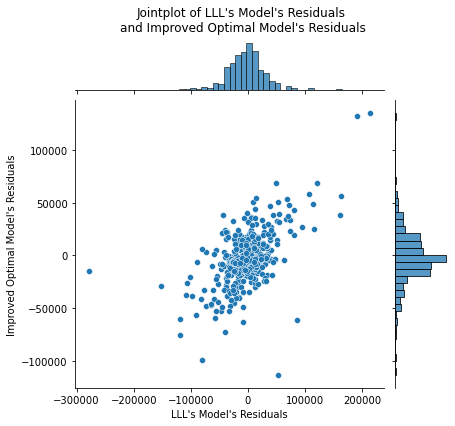

In [272]:
residual_jointplot = sns.jointplot(x=lll_residuals, y=iopt_residuals,kind='scatter',)
residual_jointplot.set_axis_labels("LLL's Model's Residuals", "Improved Optimal Model's Residuals")
residual_jointplot.fig.suptitle("Jointplot of LLL's Model's Residuals \nand Improved Optimal Model's Residuals")
residual_jointplot.fig.subplots_adjust(top=0.9)

fig.savefig('resid_joint.png', dpi=200) 

From the jointplot, we can see that based on the width of its histogram bins, the Improved Optimal Model has more residuals centred around 0 which means it can predict the target value of `saleprice` more accurately than L<sup>3</sup>'s Model.

We can further confirm this by taking the mean of the residuals of both L<sup>3</sup>'s Model and the Improved Optimal Model.

In [273]:
lll_residuals.mean()

-3031.6657979087313

In [274]:
qual_residuals.mean()

-2491.599288701239

In [275]:
iopt_residuals.mean()

-2100.9536768317207

As expected, the mean of the residuals of our Improved Optimal Model is closer to 0 than that of L<sup>3</sup>'s Model, confirming that the Improved Optimal Model is the more accurate model.

Additionally, it is interesting to note that the mean is negative, which suggests that our Improved Optimal Model will on average predict a value of a house to be ~$2100 **more** than its actual value.

## Conclusion and Recommendations<a name="conclusion"></a>
---

From the results of our data models, we can conclude that L<sup>3</sup>'s predictive model is not appropriate for the city of Ames, Iowa, as it has low accuracy in correctly predicting the value of houses there.
<p>
    
We can see from our [model comparison analysis](#modelcomp2) that L<sup>3</sup>'s predictive model performed worse at than our other predictive models, even our 'Quality' Model, which alones implies that the quality of the house is a stronger predictor than location, contrary to L<sup>3</sup>'s business model.

However, we should take into account that this is perhaps due to the quality of location features that we were provided with in the dataset.  
    
Out of the 4 initial location features of `ms_zoning`, `neighborhood`, `condition_1`, and `condition_2` that we were provided, we ultimately only ended up using `neighborhood` in our final Improved Optimal Model, as the other location features were seen to have been zeroed away by the feature-selecting [lasso regression](#lasso4), and even then neighborhood could not even have been said to be the 2nd strongest predictor after `gr_liv_area`; at best it was the 4th or 5th .
    
That being said, it has to be understood that all of this so far has been just based on the housing data of one city, which makes it difficult to make a definitive statement one way or the other as to whether location is the 2nd strongest predictor after size. 
    
And it is not just that it is just the one city, but there are also many factors that one would have to consider when it comes to home value predictors. The size of the city, the population of the city, the desirability of the city, the availability and convenience of public or private transport within the city or country, [all of these factors](https://www.investopedia.com/financial-edge/0410/the-5-factors-of-a-good-location.aspx) and more would affect property prices and in turn, the effect that location of a property has on its value.
    
For instance, Ames has a population [density](https://www2.census.gov/programs-surveys/decennial/2020/data/01-Redistricting_File--PL_94-171/Iowa/) of just 926.33/km<sup>2</sup> which is minimal compared to a larger city like New York city with a population [density](https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/POP010220) of 11,313.68/km<sup>2</sup>. Just based on these number alone, one could already accurately predict that property prices in New York City will be multiple times that of those in Ames. And as there is already a huge imbalance between supply and demand, highly-desirable locations such as being close to subway stations or in the city centre would have an even greater effect on the value of a home.
    
So ultimately, whether or not location is a prime consideration is the prediction of the value of property is really a matter of, fittingly, location. But, to be specific, which city, are we attempting to model house prices for. L<sup>3</sup>'s Model is more likely to be more effective in cities with higher population density and desirability. Ames, however, is not one of them.
    

## Sources<a name= "sources"></a>
---
1) Factors influencing house price(1): https://www.opendoor.com/w/blog/factors-that-influence-home-value<br><br>
2) Factors influencing house price(2): https://www.moving.com/tips/7-key-factors-that-impact-the-value-of-your-home/<br><br>
3) Factors influencing house price(3): https://blog.bhhsmichiganrealestate.com/13-factors-that-determine-your-home-appraisal-value/<br><br>
4) Ames population density: https://www2.census.gov/programs-surveys/decennial/2020/data/01-Redistricting_File--PL_94-171/Iowa/<br><br>
5) New York City population density: https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork/POP010220<br><br>
6) Factors of a good property location: https://www.investopedia.com/financial-edge/0410/the-5-factors-of-a-good-location.aspx<br>